In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Importing the Data

In [2]:
loan_data_backup = pd.read_csv("F:\Data\Loan Data Small\loan.csv")

C:\Users\gk514\anaconda3\envs\minimal_ds\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data = loan_data_backup.copy()
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d  
0       15-Jan          171.62          NaN             16-May  
1       13-Apr          119.66          NaN             13-Sep  
2       14-Jun          649.91          NaN             16-May  
3       15-Jan          357.48          NaN             16-Apr  
4       16-May           67.79       16-Jun             16-May  

[5 rows x 49 columns]

Exploring the Dataset

In [4]:
pd.options.display.max_columns = None
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2            1-Nov               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [5]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'], dtype=object)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Converting appropriate columns into integers from objects

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'].fillna(str(0), inplace=True)
loan_data['emp_length_int'].unique()

C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/2499266047.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

In [9]:
type(loan_data['emp_length_int'][0])

str

In [10]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
type(loan_data['emp_length_int'][0])

numpy.int64

In [11]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
loan_data['term_int'] = loan_data['term'].str.lstrip()
loan_data['term_int'].unique()

array(['36 months', '60 months'], dtype=object)

In [13]:
loan_data['term_int'] = loan_data['term_int'].str.replace(' months', '')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
type(loan_data['term_int'][0])

numpy.int64

In [14]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

Preprocessing date columns and converting them into months

In [15]:
loan_data['earliest_cr_line']

0        Jan-85
1        Apr-99
2         1-Nov
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716     3-Oct
Name: earliest_cr_line, Length: 39717, dtype: object

In [16]:
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(lambda x: ('0' + x) if x[0] in ['1', '2', '3', '4', '5', '6', '7', '8', '9'] else x)
loan_data['earliest_cr_line_date']
#loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format= '%b-%y')

0        Jan-85
1        Apr-99
2        01-Nov
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    03-Oct
Name: earliest_cr_line_date, Length: 39717, dtype: object

In [17]:
def prepr_earliest_cr_line(column):
    for i, date in enumerate(column):
        if date[0] in ['1', '2', '3', '4', '5', '6', '7', '8', '9']:
            column[i] = '0' + date
            column[i] = column[i].split('-')
            column[i] = column[i][::-1]
            column[i] = '-'.join(column[i])
        else:
            pass
    return column

In [18]:
loan_data['earliest_cr_line_date'] = prepr_earliest_cr_line(loan_data['earliest_cr_line'])
loan_data['earliest_cr_line_date']

C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/3367324119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = '0' + date
C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/3367324119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = column[i].split('-')
C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/3367324119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = column[i][::-1]
C:\Users\gk514\AppD

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line_date, Length: 39717, dtype: object

In [19]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'], format= '%b-%y')
loan_data['earliest_cr_line_date']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line_date, Length: 39717, dtype: datetime64[ns]

In [20]:
pd.to_datetime('2018-12-1') - loan_data['earliest_cr_line_date']

0       12387 days
1        7184 days
2        6239 days
3        8339 days
4        8370 days
           ...    
39712   10257 days
39713   11688 days
39714    7366 days
39715   10987 days
39716    5540 days
Name: earliest_cr_line_date, Length: 39717, dtype: timedelta64[ns]

In [21]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-12-1') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line']

0        407.0
1        236.0
2        205.0
3        274.0
4        275.0
         ...  
39712    337.0
39713    384.0
39714    242.0
39715    361.0
39716    182.0
Name: mths_since_earliest_cr_line, Length: 39717, dtype: float64

In [22]:
loan_data['mths_since_earliest_cr_line'].describe()

count    39717.000000
mean       259.658308
std         88.943032
min       -600.000000
25%        207.000000
50%        247.000000
75%        300.000000
max        598.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# here we saw that some months are negative which is not possible, it is due to the fact that datetime library has 1970 as the starting year but some observations in our data is older than that.

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1576            Sep-62            2062-09-01                       -525.0
1764            Sep-68            2068-09-01                       -597.0
2792            Sep-64            2064-09-01                       -549.0
3274            Sep-67            2067-09-01                       -585.0
3349            Feb-65            2065-02-01                       -554.0
...                ...                   ...                          ...
37328           Oct-68            2068-10-01                       -598.0
37442           Sep-67            2067-09-01                       -585.0
38068           Dec-68            2068-12-01                       -600.0
39549           May-63            2063-05-01                       -533.0
39617           May-63            2063-05-01                       -533.0

[90 rows x 3 columns]

In [24]:
# replacing negative values with the maximum value.
loan_data['mths_since_earliest_cr_line'].max()

598.0

In [25]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
loan_data['mths_since_earliest_cr_line'].describe()

C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/1244171496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


count    39717.000000
mean       262.275826
std         81.528530
min        121.000000
25%        207.000000
50%        247.000000
75%        301.000000
max        598.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
loan_data['issue_d']

0        11-Dec
1        11-Dec
2        11-Dec
3        11-Dec
4        11-Dec
          ...  
39712     7-Jul
39713     7-Jul
39714     7-Jul
39715     7-Jul
39716     7-Jun
Name: issue_d, Length: 39717, dtype: object

In [27]:
loan_data['issue_date'] = loan_data['issue_d'].apply(lambda x: '0' + x if x[1] == '-' else x)
loan_data['issue_date']

0        11-Dec
1        11-Dec
2        11-Dec
3        11-Dec
4        11-Dec
          ...  
39712    07-Jul
39713    07-Jul
39714    07-Jul
39715    07-Jul
39716    07-Jun
Name: issue_date, Length: 39717, dtype: object

In [28]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_date'], format= '%y-%b')
loan_data['issue_date']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_date, Length: 39717, dtype: datetime64[ns]

In [29]:
loan_data['mths_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data['issue_date']) / np.timedelta64(1, "M")))
loan_data['mths_since_issue_date']

0         84.0
1         84.0
2         84.0
3         84.0
4         84.0
         ...  
39712    137.0
39713    137.0
39714    137.0
39715    137.0
39716    138.0
Name: mths_since_issue_date, Length: 39717, dtype: float64

In [30]:
loan_data['mths_since_issue_date'].describe()

count    39717.000000
mean        96.881008
std         10.993449
min         84.000000
25%         88.000000
50%         94.000000
75%        103.000000
max        138.000000
Name: mths_since_issue_date, dtype: float64

In [31]:
loan_data['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [32]:
type(loan_data['int_rate'][0])

str

In [33]:
loan_data['int_rate_int'] = loan_data['int_rate'].str.rstrip('%')
loan_data['int_rate_int'] = pd.to_numeric(loan_data['int_rate_int'])
loan_data['int_rate_int'] = loan_data['int_rate_int'] / 100
loan_data['int_rate_int']

0        0.1065
1        0.1527
2        0.1596
3        0.1349
4        0.1269
          ...  
39712    0.0807
39713    0.1028
39714    0.0807
39715    0.0743
39716    0.1375
Name: int_rate_int, Length: 39717, dtype: float64

In [34]:
loan_data['revol_util_int'] = loan_data['revol_util'].str.rstrip('%')
loan_data['revol_util_int'] = pd.to_numeric(loan_data['revol_util_int'])
loan_data['revol_util_int'] = loan_data['revol_util_int'] / 100
loan_data['revol_util_int']

0        0.837
1        0.094
2        0.985
3        0.210
4        0.539
         ...  
39712    0.131
39713    0.269
39714    0.194
39715    0.007
39716    0.515
Name: revol_util_int, Length: 39717, dtype: float64

Converting categorical columns into Dummies

In [35]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix= 'grade', prefix_sep= ': '), 
                     pd.get_dummies(loan_data['sub_grade'], prefix= 'sub_grade', prefix_sep= ': '),
                     pd.get_dummies(loan_data['home_ownership'], prefix= 'home_ownership', prefix_sep= ': '), 
                     pd.get_dummies(loan_data['verification_status'], prefix= 'verification_status', prefix_sep= ': '), 
                     pd.get_dummies(loan_data['loan_status'], prefix= 'loan_status', prefix_sep= ': '), 
                     pd.get_dummies(loan_data['purpose'], prefix= 'purpose', prefix_sep= ': '), 
                     pd.get_dummies(loan_data['addr_state'], prefix= 'addr_state', prefix_sep= ': ')]

In [36]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
loan_data_dummies

grade: A  grade: B  grade: C  grade: D  grade: E  grade: F  grade: G  \
0             0         1         0         0         0         0         0   
1             0         0         1         0         0         0         0   
2             0         0         1         0         0         0         0   
3             0         0         1         0         0         0         0   
4             0         1         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
39712         1         0         0         0         0         0         0   
39713         0         0         1         0         0         0         0   
39714         1         0         0         0         0         0         0   
39715         1         0         0         0         0         0         0   
39716         0         0         0         0         1         0         0   

       sub_grade: A1  sub_grade: A2  sub_grade: A3  sub_grade: A4  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
39712              0              0              0              1   
39713              0              0              0              0   
39714              0              0              0              1   
39715              0              1              0              0   
39716              0              0              0              0   

       sub_grade: A5  sub_grade: B1  sub_grade: B2  sub_grade: B3  \
0                  0              0              1              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
39712              0              0              0              0   
39713              0              0              0              0   
39714              0              0              0              0   
39715              0              0              0              0   
39716              0              0              0              0   

       sub_grade: B4  sub_grade: B5  sub_grade: C1  sub_grade: C2  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              1              0   
4                  0              1              0              0   
...              ...            ...            ...            ...   
39712              0              0              0              0   
39713              0              0              1              0   
39714              0              0              0              0   
39715              0              0              0              0   
39716              0              0              0              0   

       sub_grade: C3  sub_grade: C4  sub_grade: C5  sub_grade: D1  \
0                  0              0              0              0   
1                  0              1              0              0   
2                  0              0              1              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
39712              0              0              0              0   
39713              

In [37]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state: SD', 'addr_state: TN', 'addr_state: TX', 'addr_state: UT',
       'addr_state: VA', 'addr_state: VT', 'addr_state: WA', 'addr_state: WI',
       'addr_state: WV', 'addr_state: WY'],
      dtype='object', length=174)

Dealing with missing values

In [38]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                                2459
emp_length                               1075
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                    12940
purpose                                     0
title                             

In [39]:
len(loan_data['title'].unique())

19615

In [40]:
loan_data['revol_util_int'].mean(), loan_data['revol_util_int'].median(), loan_data['revol_util_int'].mode()

(0.4883215241888749,
 0.493,
 0    0.0
 dtype: float64)

In [41]:
loan_data['revol_util_int'].isnull().sum()

50

In [42]:
loan_data['revol_util_int'].fillna(loan_data['revol_util_int'].median(), inplace=True)
loan_data['revol_util_int'].isnull().sum()

0

In [43]:
loan_data['mths_since_last_delinq'].fillna(0, inplace=True)

In [44]:
loan_data['mths_since_last_delinq']

0          0.0
1          0.0
2          0.0
3         35.0
4         38.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16        61.0
17         0.0
18         8.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27        20.0
28        18.0
29         0.0
30         0.0
31         0.0
32        68.0
33        45.0
34         0.0
35         0.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
41        38.0
42         0.0
43         0.0
44         0.0
45        45.0
46         0.0
47         0.0
48         0.0
49         0.0
50         0.0
51         0.0
52         0.0
53         0.0
54         0.0
55         0.0
56         0.0
57         0.0
58         0.0
59         0.0
60         0.0
61         0.0
62         0.0
63         0.0
64         0.0
65         0.0
66        

In [45]:
type(loan_data['last_pymnt_d'][0])

str

In [46]:
loan_data['last_pymnt_date'] = loan_data['last_pymnt_d'].apply(lambda x: ('0' + x) if str(x)[1] == '-' else x)

In [47]:
loan_data['last_pymnt_date'] = pd.to_datetime(loan_data['last_pymnt_date'], format= '%y-%b')
loan_data['last_pymnt_date']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
5       2015-01-01
6       2016-05-01
7       2015-01-01
8       2012-04-01
9       2012-11-01
10      2013-06-01
11      2013-09-01
12      2012-07-01
13      2015-01-01
14      2013-10-01
15      2015-01-01
16      2015-01-01
17      2013-05-01
18      2015-02-01
19      2012-07-01
20      2015-08-01
21      2013-09-01
22      2015-01-01
23      2013-10-01
24      2012-10-01
25      2012-09-01
26             NaT
27      2012-12-01
28      2013-04-01
29      2014-12-01
30      2015-01-01
31      2013-08-01
32      2016-05-01
33      2015-01-01
34      2015-01-01
35      2015-01-01
36      2013-11-01
37      2014-01-01
38      2014-04-01
39      2016-05-01
40      2015-01-01
41      2015-01-01
42      2015-01-01
43      2015-01-01
44      2012-07-01
45      2015-01-01
46      2014-08-01
47      2015-01-01
48      2012-07-01
49      2015-01-01
50      2014-10-01
51      2015-01-01
52      2015

In [48]:
loan_data['mths_since_last_pymnt_date'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data['last_pymnt_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_last_pymnt_date']

0         47.0
1         68.0
2         54.0
3         47.0
4         31.0
5         47.0
6         31.0
7         47.0
8         80.0
9         73.0
10        66.0
11        63.0
12        77.0
13        47.0
14        62.0
15        47.0
16        47.0
17        67.0
18        46.0
19        77.0
20        40.0
21        63.0
22        47.0
23        62.0
24        74.0
25        75.0
26         NaN
27        72.0
28        68.0
29        48.0
30        47.0
31        64.0
32        31.0
33        47.0
34        47.0
35        47.0
36        61.0
37        59.0
38        56.0
39        31.0
40        47.0
41        47.0
42        47.0
43        47.0
44        77.0
45        47.0
46        52.0
47        47.0
48        77.0
49        47.0
50        50.0
51        47.0
52        47.0
53        76.0
54        53.0
55        50.0
56        62.0
57        65.0
58        76.0
59        47.0
60        35.0
61        34.0
62        64.0
63        48.0
64        44.0
65        47.0
66        

In [49]:
loan_data['mths_since_last_pymnt_date'].describe()

count    39646.000000
mean        67.704207
std         18.304117
min         31.000000
25%         54.000000
50%         68.000000
75%         80.000000
max        131.000000
Name: mths_since_last_pymnt_date, dtype: float64

In [50]:
loan_data['mths_since_last_pymnt_date'].isnull().sum()

71

In [51]:
loan_data['mths_since_last_pymnt_date'].fillna(loan_data['mths_since_last_pymnt_date'].max(), inplace=True)
loan_data['mths_since_last_pymnt_date'].isnull().sum()

0

In [52]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     0.0   
1           Apr-99               5                     0.0   
2           Nov-01               2                     0.0   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

Converting the target column into zeros and ones.
Zero - Defaulted borrower (Bad borrower)
One - Non-Defaulted borrower (Good borrower)

In [53]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Fully Paid', 'Current']), 1, 0)
loan_data['good_bad']

0        1
1        0
2        1
3        1
4        1
5        1
6        1
7        1
8        0
9        0
10       1
11       1
12       0
13       1
14       0
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       1
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       1
46       0
47       1
48       1
49       1
50       0
51       1
52       1
53       0
54       1
55       0
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       0
65       1
66       0
67       1
68       0
69       1
70       1
71       0
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1

In [54]:
loan_data['good_bad'].value_counts()

1    34090
0     5627
Name: good_bad, dtype: int64

In [55]:
loan_data_with_dropped_cols = loan_data.drop(['funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'out_prncp_inv', 'total_pymnt_inv', 'next_pymnt_d'], axis=1)
loan_data_with_dropped_cols.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'emp_length_int', 'term_int', 'earliest_cr_line_date',
       'mths_since_earliest_cr_line', 'issue_date',
       'mths_since_issue_date', 'int_rate_int', 'revol_util_int',
       'grade: A', 'grade: B', 'grade: C', 'grade: D', 'grade: E',
       'grade: F', 'grade: G', 'sub_grade: A1', 'sub_grade: A2',
       'sub_

In [56]:
len(loan_data_with_dropped_cols.columns.values), len(loan_data.columns.values)

(167, 177)

Splitting the data into train and test sets

In [57]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_with_dropped_cols.drop(['good_bad'], axis=1), loan_data_with_dropped_cols['good_bad'], test_size=0.2, random_state=42)

In [58]:
loan_data_inputs_train.shape

(31773, 166)

In [59]:
loan_data_inputs_test.shape

(7944, 166)

In [60]:
loan_data_targets_train.shape

(31773,)

In [61]:
loan_data_targets_test.shape

(7944,)

In [145]:
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

Calculating Weight of Evidence(WoE) and Information Value (IV)

In [146]:
df_inputs_prepr['grade'].unique()

array(['B', 'C', 'E', 'A', 'D', 'G', 'F'], dtype=object)

In [147]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

grade  good_bad
18340     B         1
8413      B         1
14612     C         0
33544     B         1
1829      B         1

In [148]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A      2047
1     B      2322
2     C      1672
3     D      1081
4     E       556
5     F       210
6     G        56

In [149]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.947240
1     B  0.886736
2     C  0.832536
3     D  0.803885
4     E  0.744604
5     F  0.661905
6     G  0.678571

In [150]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(), df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)
df1

grade  good_bad grade  good_bad
0     A      2047     A  0.947240
1     B      2322     B  0.886736
2     C      1672     C  0.832536
3     D      1081     D  0.803885
4     E       556     E  0.744604
5     F       210     F  0.661905
6     G        56     G  0.678571

In [151]:
df1 = df1.iloc[: , [0, 1, 3]]
df1.head()

grade  good_bad  good_bad
0     A      2047  0.947240
1     B      2322  0.886736
2     C      1672  0.832536
3     D      1081  0.803885
4     E       556  0.744604

In [152]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A   2047   0.947240
1     B   2322   0.886736
2     C   1672   0.832536
3     D   1081   0.803885
4     E    556   0.744604
5     F    210   0.661905
6     G     56   0.678571

In [153]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A   2047   0.947240    0.257679
1     B   2322   0.886736    0.292296
2     C   1672   0.832536    0.210473
3     D   1081   0.803885    0.136078
4     E    556   0.744604    0.069990
5     F    210   0.661905    0.026435
6     G     56   0.678571    0.007049

In [154]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = df1['n_obs'] - df1['n_good']
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad
0     A   2047   0.947240    0.257679  1939.0  108.0
1     B   2322   0.886736    0.292296  2059.0  263.0
2     C   1672   0.832536    0.210473  1392.0  280.0
3     D   1081   0.803885    0.136078   869.0  212.0
4     E    556   0.744604    0.069990   414.0  142.0
5     F    210   0.661905    0.026435   139.0   71.0
6     G     56   0.678571    0.007049    38.0   18.0

In [155]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad
0     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720
1     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402
2     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784
4     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799
5     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899
6     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453

In [156]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   
1     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
2     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
5     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
6     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   

        WoE  
0  1.053388  
1  0.223414  
2 -0.230701  
3 -0.423651  
4 -0.764369  
5 -1.162614  
6 -1.087194

In [157]:
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
1     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   
2     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
5     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
6     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   

        WoE  
0 -1.162614  
1 -1.087194  
2 -0.764369  
3 -0.423651  
4 -0.230701  
5  0.223414  
6  1.053388

In [158]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
1     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   
2     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
5     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
6     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   

        WoE  diff_prop_good  diff_WoE  
0 -1.162614             NaN       NaN  
1 -1.087194        0.016667  0.075420  
2 -0.764369        0.066033  0.322825  
3 -0.423651        0.059281  0.340718  
4 -0.230701        0.028651  0.192950  
5  0.223414        0.054200  0.454114  
6  1.053388        0.060504  0.829975

In [159]:
df1['IV'] = ((df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE'])
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
1     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   
2     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
5     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
6     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.162614             NaN       NaN  0.364885  
1 -1.087194        0.016667  0.075420  0.364885  
2 -0.764369        0.066033  0.322825  0.364885  
3 -0.423651        0.059281  0.340718  0.364885  
4 -0.230701        0.028651  0.192950  0.364885  
5  0.223414        0.054200  0.454114  0.364885  
6  1.053388        0.060504  0.829975  0.364885

In [160]:
# this function calculates WoE and IV for a categorical variable.
def woe_categorical(df, variable, good_bad_df):
    df = pd.concat([df[variable], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['n_obs'] - df['n_good']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values('WoE')
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE'])
    df['IV'] = df['IV'].sum()
    return df

In [161]:
temp_df = woe_categorical(df_inputs_prepr, 'grade', df_targets_prepr)
temp_df

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
1     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   
2     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
5     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
6     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.162614             NaN       NaN  0.364885  
1 -1.087194        0.016667  0.075420  0.364885  
2 -0.764369        0.066033  0.322825  0.364885  
3 -0.423651        0.059281  0.340718  0.364885  
4 -0.230701        0.028651  0.192950  0.364885  
5  0.223414        0.054200  0.454114  0.364885  
6  1.053388        0.060504  0.829975  0.364885

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [163]:
# this function plots the WoE values against the categories of the variable.
def plot_woe(df_WoE, rotation_of_xaxis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + str(df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_xaxis_labels)
    plt.show()

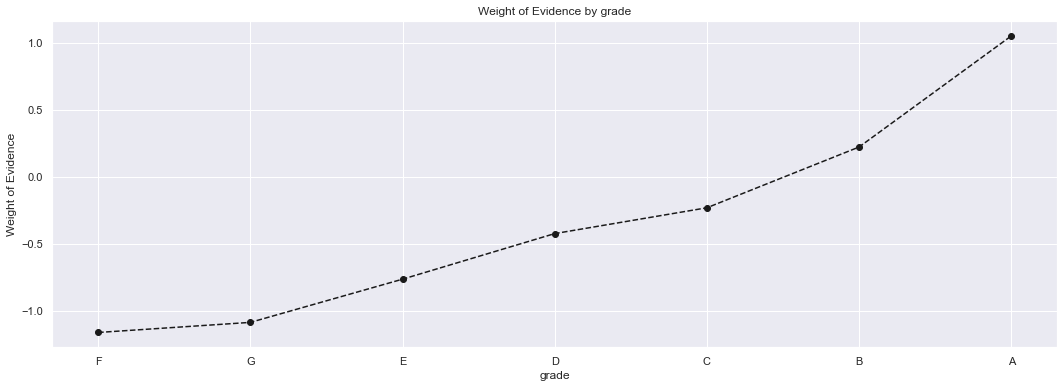

In [164]:
plot_woe(temp_df)

In [165]:
temp_df = woe_categorical(df_inputs_prepr, 'home_ownership', df_targets_prepr)
temp_df

home_ownership  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           RENT   3805   0.848357    0.478978  3228.0  577.0     0.471241   
1            OWN    621   0.851852    0.078172   529.0   92.0     0.077226   
2       MORTGAGE   3499   0.879108    0.440458  3076.0  423.0     0.449051   
3          OTHER     17   0.882353    0.002140    15.0    2.0     0.002190   
4           NONE      2   1.000000    0.000252     2.0    0.0     0.000292   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.527422 -0.112632             NaN       NaN  inf  
1    0.084095 -0.085208        0.003494  0.027424  inf  
2    0.386654  0.149605        0.027256  0.234813  inf  
3    0.001828  0.180495        0.003245  0.030890  inf  
4    0.000000       inf        0.117647       inf  inf

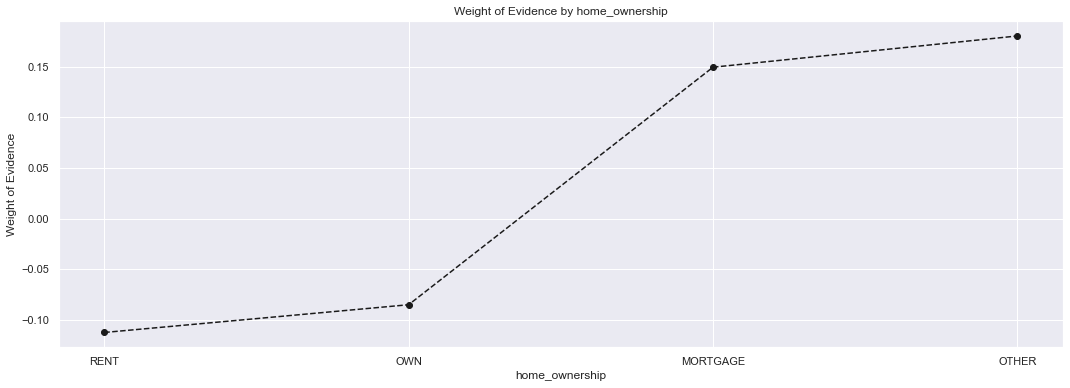

In [166]:
plot_woe(temp_df)

Making new categories based on WoE values

In [167]:
df_inputs_prepr['home_ownership: MORTGAGE_OTHER_NONE'] = sum([df_inputs_prepr['home_ownership: OTHER'], df_inputs_prepr['home_ownership: MORTGAGE'], df_inputs_prepr['home_ownership: NONE']])

In [168]:
temp_df = woe_categorical(df_inputs_prepr, 'addr_state', df_targets_prepr)
temp_df

C:\Users\gk514\anaconda3\envs\minimal_ds\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0          NE      2   0.000000    0.000252     0.0    2.0     0.000000   
1          AK     15   0.666667    0.001888    10.0    5.0     0.001460   
2          TN      3   0.666667    0.000378     2.0    1.0     0.000292   
3          NV     96   0.802083    0.012085    77.0   19.0     0.011241   
4          OR     95   0.821053    0.011959    78.0   17.0     0.011387   
5          FL    582   0.821306    0.073263   478.0  104.0     0.069781   
6          WV     40   0.825000    0.005035    33.0    7.0     0.004818   
7          OK     61   0.836066    0.007679    51.0   10.0     0.007445   
8          MN    130   0.838462    0.016365   109.0   21.0     0.015912   
9          WI     93   0.838710    0.011707    78.0   15.0     0.011387   
10         GA    286   0.839161    0.036002   240.0   46.0     0.035036   
11         HI     25   0.840000    0.003147    21.0    4.0     0.003066   
12         NJ    379   0.844327    0.047709   320.0   59.0     0.046715   
13         KY     65   0.846154    0.008182    55.0   10.0     0.008029   
14         MD    224   0.848214    0.028197   190.0   34.0     0.027737   
15         UT     53   0.849057    0.006672    45.0    8.0     0.006569   
16         SC    100   0.850000    0.012588    85.0   15.0     0.012409   
17         CA   1406   0.851351    0.176989  1197.0  209.0     0.174745   
18         NC    159   0.855346    0.020015   136.0   23.0     0.019854   
19         NY    742   0.859838    0.093404   638.0  104.0     0.093139   
20         MO    132   0.863636    0.016616   114.0   18.0     0.016642   
21         MI    141   0.865248    0.017749   122.0   19.0     0.017810   
22         CO    172   0.866279    0.021652   149.0   23.0     0.021752   
23         MT     15   0.866667    0.001888    13.0    2.0     0.001898   
24         NM     31   0.870968    0.003902    27.0    4.0     0.003942   
25         WA    165   0.872727    0.020770   144.0   21.0     0.021022   
26         VT      8   0.875000    0.001007     7.0    1.0     0.001022   
27         VA    288   0.875000    0.036254   252.0   36.0     0.036788   
28         DE     16   0.875000    0.002014    14.0    2.0     0.002044   
29         AR     50   0.880000    0.006294    44.0    6.0     0.006423   
30         IL    302   0.880795    0.038016   266.0   36.0     0.038832   
31         AL     78   0.884615    0.009819    69.0    9.0     0.010073   
32         LA     79   0.886076    0.009945    70.0    9.0     0.010219   
33         OH    246   0.890244    0.030967   219.0   27.0     0.031971   
34         TX    559   0.892665    0.070368   499.0   60.0     0.072847   
35         AZ    161   0.894410    0.020267   144.0   17.0     0.021022   
36         PA    306   0.895425    0.038520   274.0   32.0     0.040000   
37         RI     39   0.897436    0.004909    35.0    4.0     0.005109   
38         DC     39   0.897436    0.004909    35.0    4.0     0.005109   
39         CT    151   0.900662    0.019008   136.0   15.0     0.019854   
40         MA    291   0.907216    0.036631   264.0   27.0     0.038540   
41         KS     54   0.907407    0.006798    49.0    5.0     0.007153   
42         NH     34   0.911765    0.004280    31.0    3.0     0.004526   
43         WY     13   0.923077    0.001636    12.0    1.0     0.001752   
44         ME      1   1.000000    0.000126     1.0    0.0     0.000146   
45         IN      1   1.000000    0.000126     1.0    0.0     0.000146   
46         SD      9   1.000000    0.001133     9.0    0.0     0.001314   
47         MS      7   1.000000    0.000881     7.0    0.0     0.001022   

    prop_n_bad       WoE  diff_prop_good      diff_WoE   IV  
0     0.001828      -inf             NaN           NaN  inf  
1     0.004570 -1.141261        0.666667           inf  inf  
2     0.000914 -1.141261        0.000000  2.220446e-16  inf  
3     0.017367 -0.435042        0.135417  7.062193e-01  inf  
4     0.015539 -0

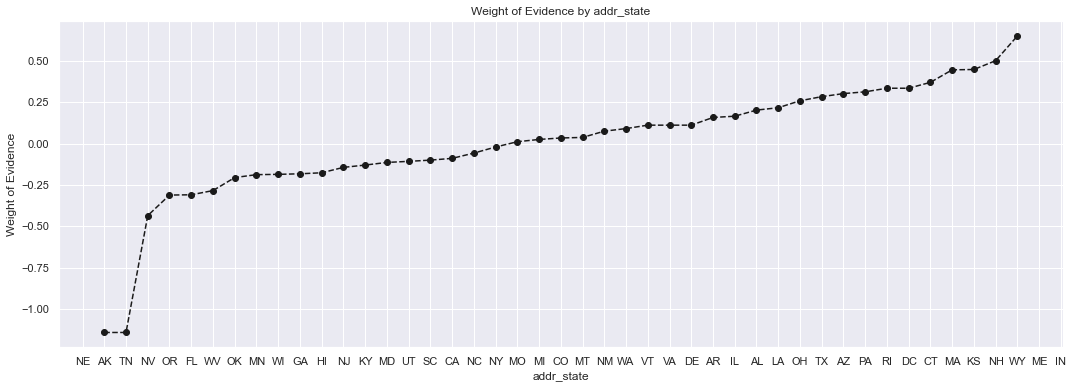

In [169]:
plot_woe(temp_df)

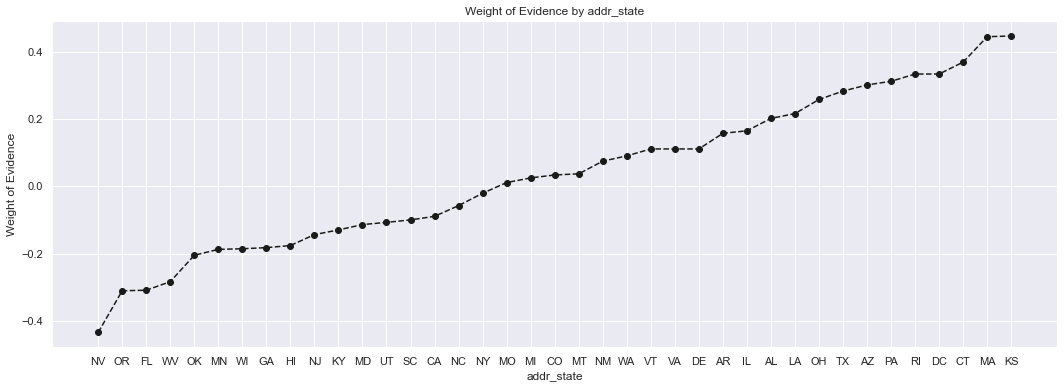

In [170]:
plot_woe(temp_df.iloc[3: -6, :])

In [171]:
df_inputs_prepr['addr_state: NE_NV_SD'] = sum([df_inputs_prepr['addr_state: NE'], df_inputs_prepr['addr_state: NV'], df_inputs_prepr['addr_state: SD']])
df_inputs_prepr['addr_state: FL_MO'] = sum([df_inputs_prepr['addr_state: FL'], df_inputs_prepr['addr_state: MO']])
df_inputs_prepr['addr_state: MS_ID_NM_HI'] = sum([df_inputs_prepr['addr_state: MS'], df_inputs_prepr['addr_state: ID'], df_inputs_prepr['addr_state: NM'], df_inputs_prepr['addr_state: HI']])
df_inputs_prepr['addr_state: NH_WA_UT_MD_AK'] = sum([df_inputs_prepr['addr_state: NH'], df_inputs_prepr['addr_state: WA'], df_inputs_prepr['addr_state: UT'], df_inputs_prepr['addr_state: MD'], df_inputs_prepr['addr_state: AK']])
df_inputs_prepr['addr_state: GA_OR'] = sum([df_inputs_prepr['addr_state: GA'], df_inputs_prepr['addr_state: OR']])
df_inputs_prepr['addr_state: NJ_AZ'] = sum([df_inputs_prepr['addr_state: NJ'], df_inputs_prepr['addr_state: AZ']])
df_inputs_prepr['addr_state: MI_NC'] = sum([df_inputs_prepr['addr_state: MI'], df_inputs_prepr['addr_state: NC']])
df_inputs_prepr['addr_state: SC_KY'] = sum([df_inputs_prepr['addr_state: SC'], df_inputs_prepr['addr_state: KY']])
df_inputs_prepr['addr_state: RI_CT_IL_OH_WI_MT'] = sum([df_inputs_prepr['addr_state: RI'], df_inputs_prepr['addr_state: CT'], df_inputs_prepr['addr_state: IL'], df_inputs_prepr['addr_state: OH'], df_inputs_prepr['addr_state: WI'], df_inputs_prepr['addr_state: MT']])
df_inputs_prepr['addr_state: OK_VA_MA'] = sum([df_inputs_prepr['addr_state: OK'], df_inputs_prepr['addr_state: VA'], df_inputs_prepr['addr_state: MA']])
df_inputs_prepr['addr_state: MN_LA_PA'] = sum([df_inputs_prepr['addr_state: MN'], df_inputs_prepr['addr_state: LA'], df_inputs_prepr['addr_state: PA']])
df_inputs_prepr['addr_state: CO_AL_KS'] = sum([df_inputs_prepr['addr_state: CO'], df_inputs_prepr['addr_state: AL'], df_inputs_prepr['addr_state: KS']])
df_inputs_prepr['addr_state: VT_AR_WV_DE'] = sum([df_inputs_prepr['addr_state: VT'], df_inputs_prepr['addr_state: AR'], df_inputs_prepr['addr_state: WV'], df_inputs_prepr['addr_state: DE']])
df_inputs_prepr['addr_state: TN_DC_WY_IA_ME_IN'] = sum([df_inputs_prepr['addr_state: TN'], df_inputs_prepr['addr_state: DC'], df_inputs_prepr['addr_state: WY'], df_inputs_prepr['addr_state: IA'], df_inputs_prepr['addr_state: ME'], df_inputs_prepr['addr_state: IN']])

In [172]:
temp_df = woe_categorical(df_inputs_prepr, 'verification_status', df_targets_prepr)
temp_df

verification_status  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0            Verified   2587   0.836877    0.325655  2165.0  422.0   
1     Source Verified   1992   0.868976    0.250755  1731.0  261.0   
2        Not Verified   3365   0.877860    0.423590  2954.0  411.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.316058    0.385740 -0.199238             NaN       NaN  0.022358  
1     0.252701    0.238574  0.057526        0.032099  0.256764  0.022358  
2     0.431241    0.375686  0.137914        0.008884  0.080388  0.022358

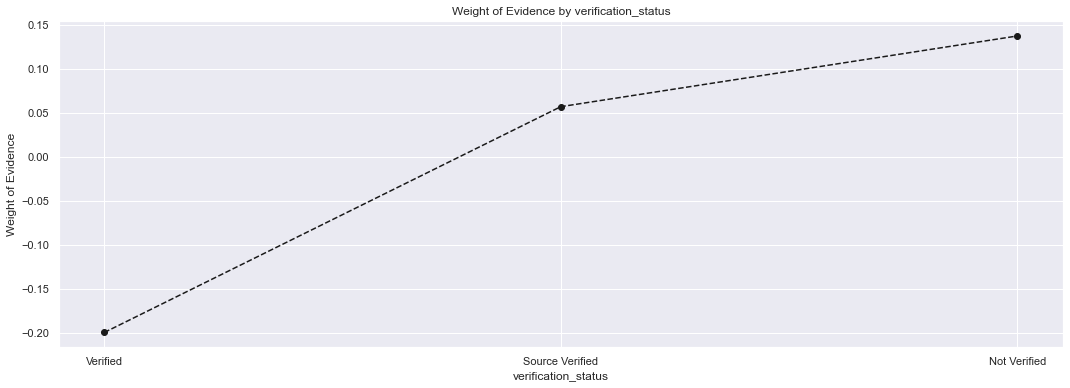

In [173]:
plot_woe(temp_df)

In [174]:
temp_df = woe_categorical(df_inputs_prepr, 'purpose', df_targets_prepr)
temp_df

purpose  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       small_business    361   0.747922    0.045443   270.0   91.0   
1               moving    110   0.827273    0.013847    91.0   19.0   
2                other    786   0.844784    0.098943   664.0  122.0   
3   debt_consolidation   3747   0.854283    0.471677  3201.0  546.0   
4              medical    141   0.865248    0.017749   122.0   19.0   
5                  car    296   0.875000    0.037261   259.0   37.0   
6             vacation     74   0.878378    0.009315    65.0    9.0   
7              wedding    194   0.881443    0.024421   171.0   23.0   
8     home_improvement    593   0.888702    0.074648   527.0   66.0   
9          educational     65   0.892308    0.008182    58.0    7.0   
10    renewable_energy     19   0.894737    0.002392    17.0    2.0   
11      major_purchase    432   0.895833    0.054381   387.0   45.0   
12         credit_card   1050   0.903810    0.132175   949.0  101.0   
13               house     76   0.907895    0.009567    69.0    7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.039416    0.083181 -0.746845             NaN       NaN  0.069347  
1      0.013285    0.017367 -0.267987        0.079350  0.478858  0.069347  
2      0.096934    0.111517 -0.140147        0.017511  0.127841  0.069347  
3      0.467299    0.499086 -0.065808        0.009500  0.074338  0.069347  
4      0.017810    0.017367  0.025174        0.010965  0.090983  0.069347  
5      0.037810    0.033821  0.111502        0.009752  0.086328  0.069347  
6      0.009489    0.008227  0.142755        0.003378  0.031253  0.069347  
7      0.024964    0.021024  0.171761        0.003065  0.029007  0.069347  
8      0.076934    0.060329  0.243138        0.007258  0.071376  0.069347  
9      0.008467    0.006399  0.280125        0.003606  0.036987  0.069347  
10     0.002482    0.001828  0.305658        0.002429  0.025533  0.069347  
11     0.056496    0.041133  0.317354        0.001096  0.011696  0.069347  
12     0.138540    0.092322  0.405880        0.007976  0.088526  0.069347  
13     0.010073    0.006399  0.453788        0.004085  0.047908  0.069347

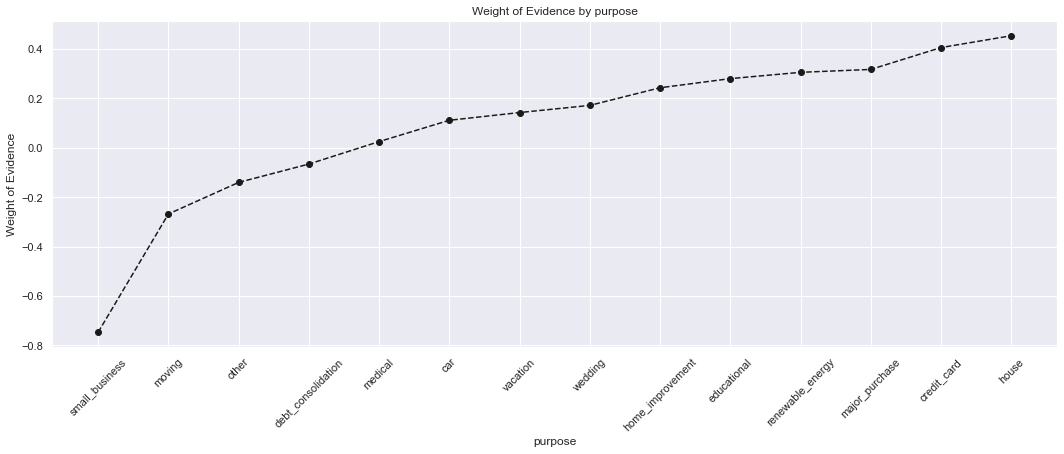

In [175]:
plot_woe(temp_df, rotation_of_xaxis_labels=45)

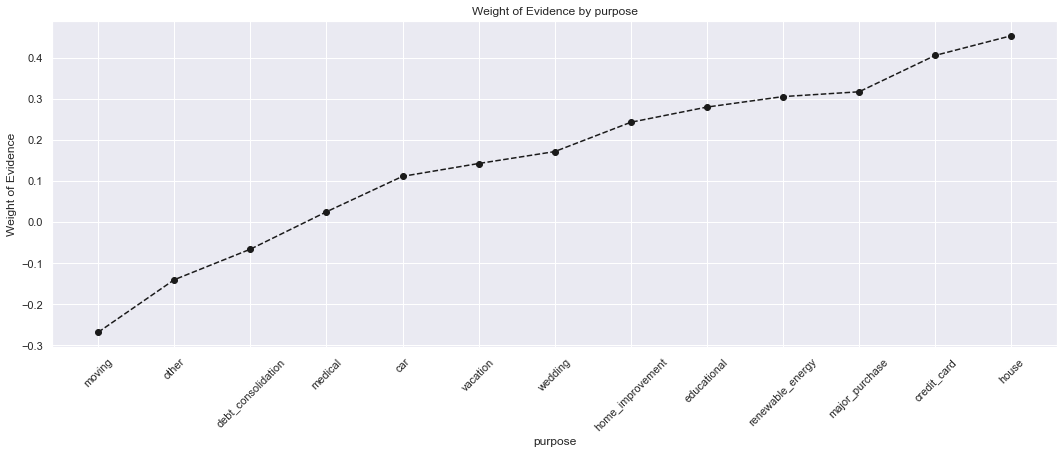

In [176]:
plot_woe(temp_df.iloc[1: , :], rotation_of_xaxis_labels=45)

In [177]:
df_inputs_prepr['purpose: renewable_energy_educational_house'] = sum([df_inputs_prepr['purpose: renewable_energy'], df_inputs_prepr['purpose: educational'], df_inputs_prepr['purpose: house']])
df_inputs_prepr['purpose: medical_moving'] = sum([df_inputs_prepr['purpose: medical'], df_inputs_prepr['purpose: moving']])
df_inputs_prepr['purpose: major_purchase_car_wedding'] = sum([df_inputs_prepr['purpose: major_purchase'], df_inputs_prepr['purpose: car'], df_inputs_prepr['purpose: wedding']])

In [178]:
df_inputs_prepr['sub_grade'].value_counts()

B3    611
A4    587
A5    584
B5    520
B4    463
C1    461
C2    391
B2    390
A3    378
B1    338
C3    327
A2    277
D2    265
C5    254
C4    239
D3    228
A1    221
D4    211
D1    193
D5    184
E1    152
E2    135
E3    105
E4     86
E5     78
F1     76
F2     40
F4     37
F3     31
F5     26
G1     24
G2     12
G4     10
G3      6
G5      4
Name: sub_grade, dtype: int64

In [179]:
temp_df = woe_categorical(df_inputs_prepr, 'sub_grade', df_targets_prepr)
temp_df

sub_grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0         G3      6   0.333333    0.000755     2.0    4.0     0.000292   
1         F5     26   0.576923    0.003273    15.0   11.0     0.002190   
2         G2     12   0.583333    0.001511     7.0    5.0     0.001022   
3         F2     40   0.625000    0.005035    25.0   15.0     0.003650   
4         F1     76   0.631579    0.009567    48.0   28.0     0.007007   
5         F4     37   0.702703    0.004658    26.0   11.0     0.003796   
6         E5     78   0.705128    0.009819    55.0   23.0     0.008029   
7         G1     24   0.708333    0.003021    17.0    7.0     0.002482   
8         E1    152   0.710526    0.019134   108.0   44.0     0.015766   
9         E2    135   0.748148    0.016994   101.0   34.0     0.014745   
10        E4     86   0.755814    0.010826    65.0   21.0     0.009489   
11        D5    184   0.766304    0.023162   141.0   43.0     0.020584   
12        D3    228   0.776316    0.028701   177.0   51.0     0.025839   
13        G4     10   0.800000    0.001259     8.0    2.0     0.001168   
14        F3     31   0.806452    0.003902    25.0    6.0     0.003650   
15        C4    239   0.807531    0.030086   193.0   46.0     0.028175   
16        E3    105   0.809524    0.013218    85.0   20.0     0.012409   
17        D4    211   0.810427    0.026561   171.0   40.0     0.024964   
18        C5    254   0.811024    0.031974   206.0   48.0     0.030073   
19        D1    193   0.818653    0.024295   158.0   35.0     0.023066   
20        C2    391   0.828645    0.049220   324.0   67.0     0.047299   
21        C3    327   0.834862    0.041163   273.0   54.0     0.039854   
22        D2    265   0.837736    0.033359   222.0   43.0     0.032409   
23        C1    461   0.859002    0.058031   396.0   65.0     0.057810   
24        B5    520   0.876923    0.065458   456.0   64.0     0.066569   
25        B2    390   0.879487    0.049094   343.0   47.0     0.050073   
26        B3    611   0.887070    0.076913   542.0   69.0     0.079124   
27        B4    463   0.889849    0.058283   412.0   51.0     0.060146   
28        B1    338   0.905325    0.042548   306.0   32.0     0.044672   
29        A5    584   0.919521    0.073515   537.0   47.0     0.078394   
30        A4    587   0.950596    0.073892   558.0   29.0     0.081460   
31        A3    378   0.960317    0.047583   363.0   15.0     0.052993   
32        A1    221   0.963801    0.027820   213.0    8.0     0.031095   
33        A2    277   0.967509    0.034869   268.0    9.0     0.039124   
34        G5      4   1.000000    0.000504     4.0    0.0     0.000584   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.003656 -2.527555             NaN       NaN  inf  
1     0.010055 -1.524253        0.243590  1.003302  inf  
2     0.004570 -1.497936        0.006410  0.026317  inf  
3     0.013711 -1.323582        0.041667  0.174353  inf  
4     0.025594 -1.295411        0.006579  0.028171  inf  
5     0.010055 -0.974207        0.071124  0.321205  inf  
6     0.021024 -0.962569        0.002426  0.011638  inf  
7     0.006399 -0.947105        0.003205  0.015464  inf  
8     0.040219 -0.936466        0.002193  0.010638  inf  
9     0.031079 -0.745648        0.037622  0.190818  inf  
10    0.019196 -0.704543        0.007666  0.041105  inf  
11    0.039305 -0.646848        0.010490  0.057695  inf  
12    0.046618 -0.590084        0.010011  0.056764  inf  
13    0.001828 -0.448114        0.023684  0.141970  inf  
14    0.005484 -0.407292        0.006452  0.040822  inf  
15    0.042048 -0.400359        0.001080  0.006932  inf  
16    0.018282 -0.387489        0.001992  0.012870  inf  
17    0.036563 -0.381624        0.000903  0.005865  inf  
18    0.043876 -0.377733        0.000597  0.003891  inf  
19    0.031993 -0.327161        0.007629  0.050572  inf  
20    0.061243 -0.258357        0.009992  0.068804  inf  
21    0.049360 -0.213920        0.006218  0.044437  inf  
22  

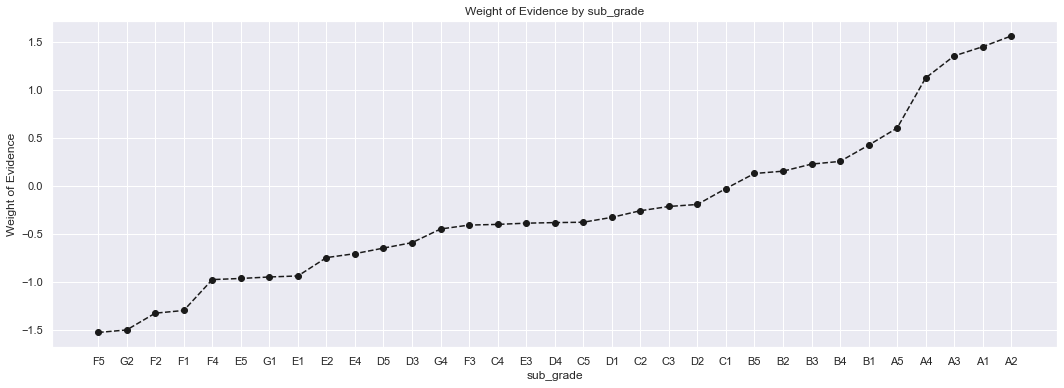

In [180]:
plot_woe(temp_df.iloc[1:-1, :])

In [181]:
# this function calculates WoE and IV for a continuous(numerical) variable.
def woe_ordered_continuous(df, variable, good_bad_df):
    df = pd.concat([df[variable], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['n_obs'] - df['n_good']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values('WoE')
    # df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE'])
    df['IV'] = df['IV'].sum()
    return df

In [182]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'emp_length_int', 'term_int', 'earliest_cr_line_date',
       'mths_since_earliest_cr_line', 'issue_date',
       'mths_since_issue_date', 'int_rate_int', 'revol_util_int',
       'grade: A', 'grade: B', 'grade: C', 'grade: D', 'grade: E',
       'grade: F', 'grade: G', 'sub_grade: A1', 'sub_grade: A2',
       'sub_

In [183]:
temp_df = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
temp_df

term_int  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        36   5818   0.892403    0.732377  5192.0  626.0     0.757956   
1        60   2126   0.779868    0.267623  1658.0  468.0     0.242044   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.572212  0.281116             NaN       NaN  0.157999  
1    0.427788 -0.569509        0.112535  0.850625  0.157999

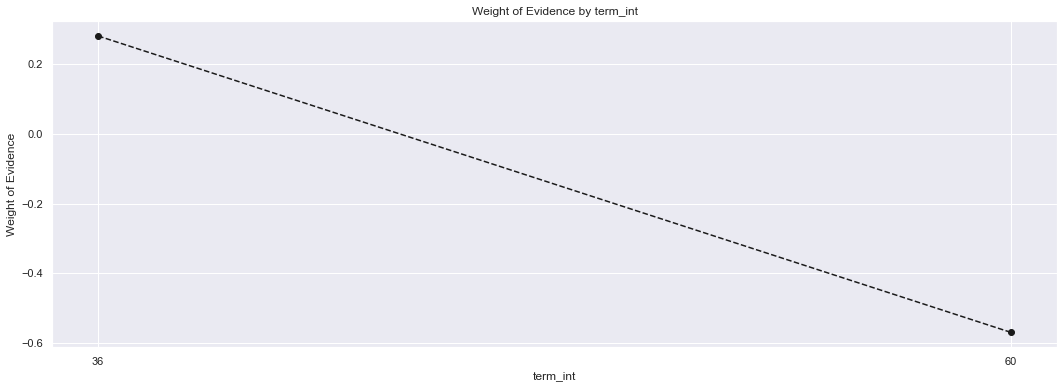

In [184]:
plot_woe(temp_df)

In [185]:
df_inputs_prepr['term: 36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term: 60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [186]:
temp_df = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
temp_df

emp_length_int  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0                0   1123   0.849510    0.141365   954.0  169.0     0.139270   
1                1    678   0.870206    0.085347   590.0   88.0     0.086131   
2                2    856   0.875000    0.107754   749.0  107.0     0.109343   
3                3    841   0.859691    0.105866   723.0  118.0     0.105547   
4                4    664   0.879518    0.083585   584.0   80.0     0.085255   
5                5    654   0.865443    0.082326   566.0   88.0     0.082628   
6                6    457   0.864333    0.057528   395.0   62.0     0.057664   
7                7    351   0.854701    0.044184   300.0   51.0     0.043796   
8                8    321   0.862928    0.040408   277.0   44.0     0.040438   
9                9    257   0.871595    0.032351   224.0   33.0     0.032701   
10              10   1742   0.854191    0.219285  1488.0  254.0     0.217226   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.154479 -0.103643             NaN       NaN  0.006617  
1     0.080439  0.068378        0.020696  0.172021  0.006617  
2     0.097806  0.111502        0.004794  0.043124  0.006617  
3     0.107861 -0.021683        0.015309  0.133186  0.006617  
4     0.073126  0.153466        0.019827  0.175150  0.006617  
5     0.080439  0.026849        0.014075  0.126617  0.006617  
6     0.056673  0.017343        0.001111  0.009506  0.006617  
7     0.046618 -0.062451        0.009632  0.079795  0.006617  
8     0.040219  0.005420        0.008227  0.067871  0.006617  
9     0.030165  0.080731        0.008667  0.075311  0.006617  
10    0.232176 -0.066554        0.017405  0.147285  0.006617

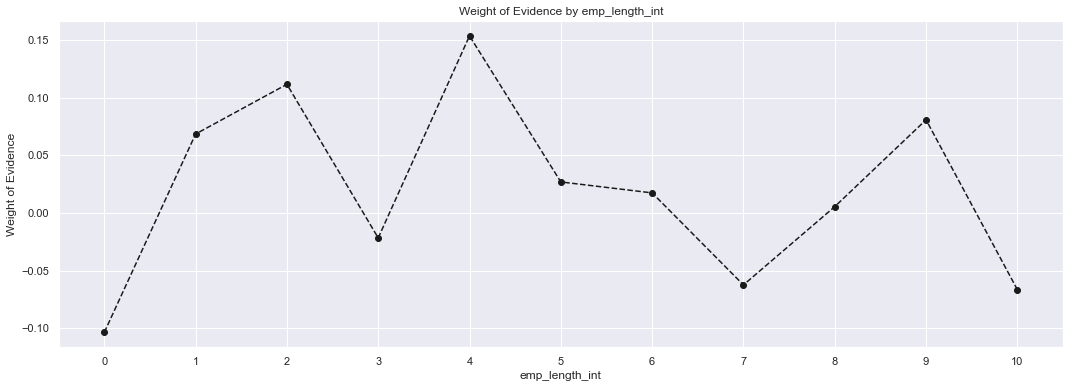

In [187]:
plot_woe(temp_df)

In [188]:
df_inputs_prepr['emp_length: 0'] = np.where((df_inputs_prepr['emp_length_int'].isin([0])), 1, 0)
df_inputs_prepr['emp_length: 1'] = np.where((df_inputs_prepr['emp_length_int'].isin([1])), 1, 0)
df_inputs_prepr['emp_length: 2-3'] = np.where((df_inputs_prepr['emp_length_int'].isin([2, 3])), 1, 0)
df_inputs_prepr['emp_length: 4-6'] = np.where((df_inputs_prepr['emp_length_int'].isin([4, 5, 6])), 1, 0)
df_inputs_prepr['emp_length: 7'] = np.where((df_inputs_prepr['emp_length_int'].isin([7])), 1, 0)
df_inputs_prepr['emp_length: 8'] = np.where((df_inputs_prepr['emp_length_int'].isin([8])), 1, 0)
df_inputs_prepr['emp_length: 9'] = np.where((df_inputs_prepr['emp_length_int'].isin([9])), 1, 0)
df_inputs_prepr['emp_length: 10'] = np.where((df_inputs_prepr['emp_length_int'].isin([10])), 1, 0)

In [189]:
len(df_inputs_prepr['mths_since_issue_date'].unique())

54

In [190]:
df_inputs_prepr['mths_since_issue_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_date'], 20)
df_inputs_prepr['mths_since_issue_date_factor']

18340      (91.95, 94.6]
8413       (86.65, 89.3]
14612      (89.3, 91.95]
33544    (107.85, 110.5]
1829     (83.947, 86.65]
14844      (89.3, 91.95]
34557    (107.85, 110.5]
25254      (97.25, 99.9]
12880      (89.3, 91.95]
953      (83.947, 86.65]
30474    (102.55, 105.2]
34071    (107.85, 110.5]
30114    (102.55, 105.2]
36866    (113.15, 115.8]
25144      (97.25, 99.9]
32843    (105.2, 107.85]
30551    (102.55, 105.2]
37673    (118.45, 121.1]
27075     (99.9, 102.55]
30747    (102.55, 105.2]
6271     (83.947, 86.65]
9758       (86.65, 89.3]
36178    (113.15, 115.8]
15421      (89.3, 91.95]
20509      (94.6, 97.25]
1670     (83.947, 86.65]
38752    (126.4, 129.05]
34305    (107.85, 110.5]
26085      (97.25, 99.9]
30229    (102.55, 105.2]
38016    (118.45, 121.1]
14686      (89.3, 91.95]
1451     (83.947, 86.65]
5053     (83.947, 86.65]
34864    (107.85, 110.5]
33684    (107.85, 110.5]
32777    (105.2, 107.85]
13637      (89.3, 91.95]
26843     (99.9, 102.55]
9064       (86.65, 89.3]


In [191]:
temp_df = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_date_factor', df_targets_prepr)
temp_df

mths_since_issue_date_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0               (83.947, 86.65]   1363   0.852531    0.171576  1162.0  201.0   
1                 (86.65, 89.3]   1152   0.850694    0.145015   980.0  172.0   
2                 (89.3, 91.95]    708   0.850282    0.089124   602.0  106.0   
3                 (91.95, 94.6]    825   0.861818    0.103852   711.0  114.0   
4                 (94.6, 97.25]    719   0.887344    0.090509   638.0   81.0   
5                 (97.25, 99.9]    463   0.866091    0.058283   401.0   62.0   
6                (99.9, 102.55]    651   0.852535    0.081949   555.0   96.0   
7               (102.55, 105.2]    506   0.897233    0.063696   454.0   52.0   
8               (105.2, 107.85]    239   0.899582    0.030086   215.0   24.0   
9               (107.85, 110.5]    333   0.864865    0.041918   288.0   45.0   
10              (110.5, 113.15]    254   0.854331    0.031974   217.0   37.0   
11              (113.15, 115.8]    148   0.858108    0.018630   127.0   21.0   
12              (115.8, 118.45]    171   0.906433    0.021526   155.0   16.0   
13              (118.45, 121.1]    128   0.851562    0.016113   109.0   19.0   
14              (121.1, 123.75]     32   0.843750    0.004028    27.0    5.0   
15              (123.75, 126.4]     38   0.815789    0.004783    31.0    7.0   
16              (126.4, 129.05]     98   0.857143    0.012336    84.0   14.0   
17              (129.05, 131.7]     70   0.842857    0.008812    59.0   11.0   
18              (131.7, 134.35]     30   0.700000    0.003776    21.0    9.0   
19              (134.35, 137.0]     16   0.875000    0.002014    14.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.169635    0.183729 -0.079815             NaN       NaN  0.027847  
1      0.143066    0.157221 -0.094350        0.001837  0.014535  0.027847  
2      0.087883    0.096892 -0.097590        0.000412  0.003240  0.027847  
3      0.103796    0.104205 -0.003934        0.011536  0.093656  0.027847  
4      0.093139    0.074040  0.229481        0.025525  0.233415  0.027847  
5      0.058540    0.056673  0.032419        0.021253  0.197062  0.027847  
6      0.081022    0.087751 -0.079788        0.013556  0.112207  0.027847  
7      0.066277    0.047532  0.332446        0.044699  0.412234  0.027847  
8      0.031387    0.021938  0.358176        0.002348  0.025731  0.027847  
9      0.042044    0.041133  0.021890        0.034717  0.336286  0.027847  
10     0.031679    0.033821 -0.065429        0.010534  0.087319  0.027847  
11     0.018540    0.019196 -0.034743        0.003777  0.030685  0.027847  
12     0.022628    0.014625  0.436428        0.048325  0.471172  0.027847  
13     0.015912    0.017367 -0.087499        0.054870  0.523927  0.027847  
14     0.003942    0.004570 -0.148009        0.007812  0.060510  0.027847  
15     0.004526    0.006399 -0.346331        0.027961  0.198322  0.027847  
16     0.012263    0.012797 -0.042648        0.041353  0.303682  0.027847  
17     0.008613    0.010055 -0.154766        0.014286  0.112117  0.027847  
18     0.003066    0.008227 -0.987110        0.142857  0.832344  0.027847  
19     0.002044    0.001828  0.111502        0.175000  1.098612  0.027847

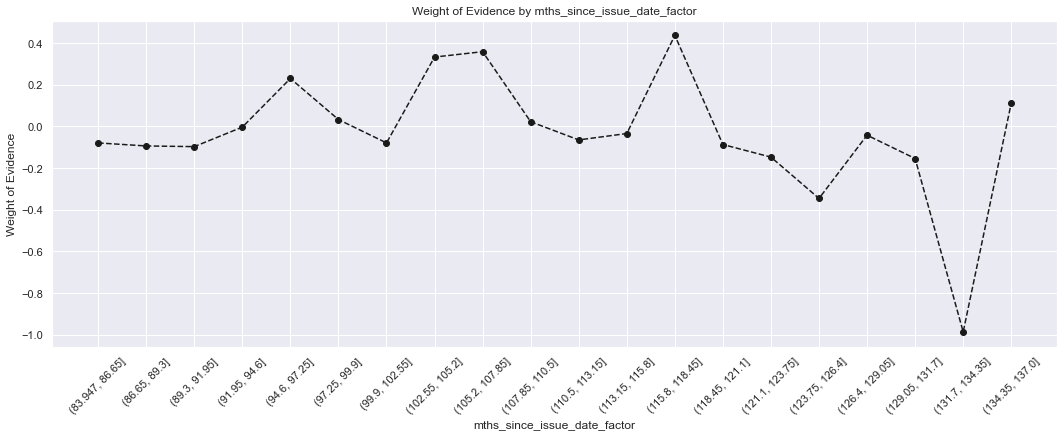

In [192]:
plot_woe(temp_df, 45)

In [193]:
df_inputs_prepr['mths_since_issue_date: <86'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(87)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 87-89'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(87, 90)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 90-92'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(90, 93)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 93-97'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(93, 98)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 98-102'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(98, 103)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 103-108'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(103, 109)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 109-111'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(109, 112)), 1, 0)
df_inputs_prepr['mths_since_issue_date: 111-119'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(112, 120)), 1, 0)
df_inputs_prepr['mths_since_issue_date: >119'] = np.where(df_inputs_prepr['mths_since_issue_date_factor'].isin(range(120, int(df_inputs_prepr['mths_since_issue_date'].max()))), 1, 0)

In [194]:
df_inputs_prepr['annual_inc'].isnull().sum()

0

In [195]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
temp_df = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
temp_df

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0        (2804.0, 15960.0]    126   0.793651    0.015861   100.0   26.0   
1       (15960.0, 27920.0]    518   0.816602    0.065206   423.0   95.0   
2       (27920.0, 39880.0]   1110   0.817117    0.139728   907.0  203.0   
3       (39880.0, 51840.0]   1518   0.855731    0.191088  1299.0  219.0   
4       (51840.0, 63800.0]   1262   0.864501    0.158862  1091.0  171.0   
5       (63800.0, 75760.0]   1038   0.871869    0.130665   905.0  133.0   
6       (75760.0, 87720.0]    667   0.886057    0.083963   591.0   76.0   
7       (87720.0, 99680.0]    479   0.903967    0.060297   433.0   46.0   
8      (99680.0, 111640.0]    366   0.896175    0.046073   328.0   38.0   
9     (111640.0, 123600.0]    233   0.896996    0.029330   209.0   24.0   
10    (123600.0, 135560.0]    199   0.889447    0.025050   177.0   22.0   
11    (135560.0, 147520.0]     94   0.936170    0.011833    88.0    6.0   
12    (147520.0, 159480.0]     71   0.873239    0.008938    62.0    9.0   
13    (159480.0, 171440.0]     66   0.878788    0.008308    58.0    8.0   
14    (171440.0, 183400.0]     45   0.911111    0.005665    41.0    4.0   
15    (183400.0, 195360.0]     27   0.777778    0.003399    21.0    6.0   
16    (195360.0, 207320.0]     28   0.964286    0.003525    27.0    1.0   
17    (207320.0, 219280.0]      7   1.000000    0.000881     7.0    0.0   
18    (219280.0, 231240.0]     21   0.809524    0.002644    17.0    4.0   
19    (231240.0, 243200.0]      2   1.000000    0.000252     2.0    0.0   
20    (243200.0, 255160.0]     20   0.900000    0.002518    18.0    2.0   
21    (255160.0, 267120.0]      5   1.000000    0.000629     5.0    0.0   
22    (267120.0, 279080.0]      3   1.000000    0.000378     3.0    0.0   
23    (279080.0, 291040.0]      3   1.000000    0.000378     3.0    0.0   
24    (291040.0, 303000.0]     10   0.900000    0.001259     9.0    1.0   
25    (303000.0, 314960.0]      1   1.000000    0.000126     1.0    0.0   
26    (314960.0, 326920.0]      1   1.000000    0.000126     1.0    0.0   
27    (326920.0, 338880.0]      1   1.000000    0.000126     1.0    0.0   
28    (338880.0, 350840.0]      3   1.000000    0.000378     3.0    0.0   
29    (350840.0, 362800.0]      1   1.000000    0.000126     1.0    0.0   
30    (362800.0, 374760.0]      2   1.000000    0.000252     2.0    0.0   
31    (374760.0, 386720.0]      2   1.000000    0.000252     2.0    0.0   
32    (386720.0, 398680.0]      0        NaN    0.000000     NaN    NaN   
33    (398680.0, 410640.0]      3   1.000000    0.000378     3.0    0.0   
34    (410640.0, 422600.0]      1   1.000000    0.000126     1.0    0.0   
35    (422600.0, 434560.0]      0        NaN    0.000000     NaN    NaN   
36    (434560.0, 446520.0]      2   1.000000    0.000252     2.0    0.0   
37    (446520.0, 458480.0]      0        NaN    0.000000     NaN    NaN   
38    (458480.0, 470440.0]      0        NaN    0.000000     NaN    NaN   
39    (470440.0, 482400.0]      0        NaN    0.000000     NaN    NaN   
40    (482400.0, 494360.0]      0        NaN    0.000000     NaN    NaN   
41    (494360.0, 506320.0]      1   1.000000    0.000126     1.0    0.0   
42    (506320.0, 518280.0]      0        NaN    0.000000     NaN    NaN   
43    (518280.0, 530240.0]      0        NaN    0.000000     NaN    NaN   
44    (530240.0, 542200.0]      0        NaN    0.000000     NaN    NaN   
45    (542200.0, 554160.0]      2   1.000000    0.000252     2.0    0.0   
46    (554160.0, 566120.0]      0        NaN    0.000000     NaN    NaN   
47    (566120.0, 578080.0]      0        NaN    0.000000     NaN    NaN   
48    (578080.0, 590040.0]      1   1.000000    0.000126     1.0    0.0   
49    (590040.0, 602000.0]      0        NaN    0.000000     NaN    NaN   
50    (602000.0, 613960.0]      0        NaN    0.000000     NaN    NaN   
51    (613960.0, 625920.0]      0        NaN    0.000000     NaN    NaN   
52    (625920.0, 637880.0]      0 

In [196]:
df_inputs_prepr[df_inputs_prepr['annual_inc'] > 120000]['annual_inc'].count() / df_inputs_prepr['annual_inc'].count() * 100

8.144511581067473

In [197]:
df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr['annual_inc'] <= 120000]
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/2802630961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (3884.0, 6320.0]      5   1.000000    0.000685     5.0    0.0   
1       (6320.0, 8640.0]      6   1.000000    0.000822     6.0    0.0   
2      (8640.0, 10960.0]     22   0.545455    0.003015    12.0   10.0   
3     (10960.0, 13280.0]     31   0.806452    0.004248    25.0    6.0   
4     (13280.0, 15600.0]     59   0.830508    0.008086    49.0   10.0   
5     (15600.0, 17920.0]     35   0.714286    0.004796    25.0   10.0   
6     (17920.0, 20240.0]     95   0.873684    0.013019    83.0   12.0   
7     (20240.0, 22560.0]     69   0.797101    0.009456    55.0   14.0   
8     (22560.0, 24880.0]    125   0.768000    0.017130    96.0   29.0   
9     (24880.0, 27200.0]    172   0.843023    0.023571   145.0   27.0   
10    (27200.0, 29520.0]    128   0.875000    0.017541   112.0   16.0   
11    (29520.0, 31840.0]    247   0.846154    0.033850   209.0   38.0   
12    (31840.0, 34160.0]    199   0.783920    0.027271   156.0   43.0   
13    (34160.0, 36480.0]    302   0.807947    0.041387   244.0   58.0   
14    (36480.0, 38800.0]    198   0.797980    0.027134   158.0   40.0   
15    (38800.0, 41120.0]    341   0.844575    0.046732   288.0   53.0   
16    (41120.0, 43440.0]    230   0.873913    0.031520   201.0   29.0   
17    (43440.0, 45760.0]    278   0.841727    0.038098   234.0   44.0   
18    (45760.0, 48080.0]    301   0.887043    0.041250   267.0   34.0   
19    (48080.0, 50400.0]    351   0.826211    0.048102   290.0   61.0   
20    (50400.0, 52720.0]    193   0.880829    0.026449   170.0   23.0   
21    (52720.0, 55040.0]    314   0.850318    0.043031   267.0   47.0   
22    (55040.0, 57360.0]    135   0.837037    0.018501   113.0   22.0   
23    (57360.0, 59680.0]    139   0.877698    0.019049   122.0   17.0   
24    (59680.0, 62000.0]    452   0.876106    0.061943   396.0   56.0   
25    (62000.0, 64320.0]    141   0.879433    0.019323   124.0   17.0   
26    (64320.0, 66640.0]    257   0.856031    0.035220   220.0   37.0   
27    (66640.0, 68960.0]    125   0.904000    0.017130   113.0   12.0   
28    (68960.0, 71280.0]    248   0.895161    0.033987   222.0   26.0   
29    (71280.0, 73600.0]    168   0.875000    0.023023   147.0   21.0   
30    (73600.0, 75920.0]    208   0.831731    0.028505   173.0   35.0   
31    (75920.0, 78240.0]    135   0.844444    0.018501   114.0   21.0   
32    (78240.0, 80560.0]    193   0.906736    0.026449   175.0   18.0   
33    (80560.0, 82880.0]     74   0.837838    0.010141    62.0   12.0   
34    (82880.0, 85200.0]    206   0.912621    0.028231   188.0   18.0   
35    (85200.0, 87520.0]     55   0.872727    0.007537    48.0    7.0   
36    (87520.0, 89840.0]     53   0.886792    0.007263    47.0    6.0   
37    (89840.0, 92160.0]    186   0.892473    0.025490   166.0   20.0   
38    (92160.0, 94480.0]     51   0.803922    0.006989    41.0   10.0   
39    (94480.0, 96800.0]    128   0.976562    0.017541   125.0    3.0   
40    (96800.0, 99120.0]     57   0.877193    0.007811    50.0    7.0   
41   (99120.0, 101440.0]    136   0.926471    0.018638   126.0   10.0   
42  (101440.0, 103760.0]     43   0.906977    0.005893    39.0    4.0   
43  (103760.0, 106080.0]     76   0.881579    0.010415    67.0    9.0   
44  (106080.0, 108400.0]     39   0.846154    0.005345    33.0    6.0   
45  (108400.0, 110720.0]     76   0.881579    0.010415    67.0    9.0   
46  (110720.0, 113040.0]     26   0.923077    0.003563    24.0    2.0   
47  (113040.0, 115360.0]     53   0.924528    0.007263    49.0    4.0   
48  (115360.0, 117680.0]     22   0.909091    0.003015    20.0    2.0   
49  (117680.0, 120000.0]    114   0.877193    0.015623   100.0   14.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000798    0.000000       inf             NaN       NaN  inf  
1      0.000957    0.000000       inf        0.000000       NaN  inf  
2      0.001914    0.009718 -1.624548        0.454545       inf  inf  

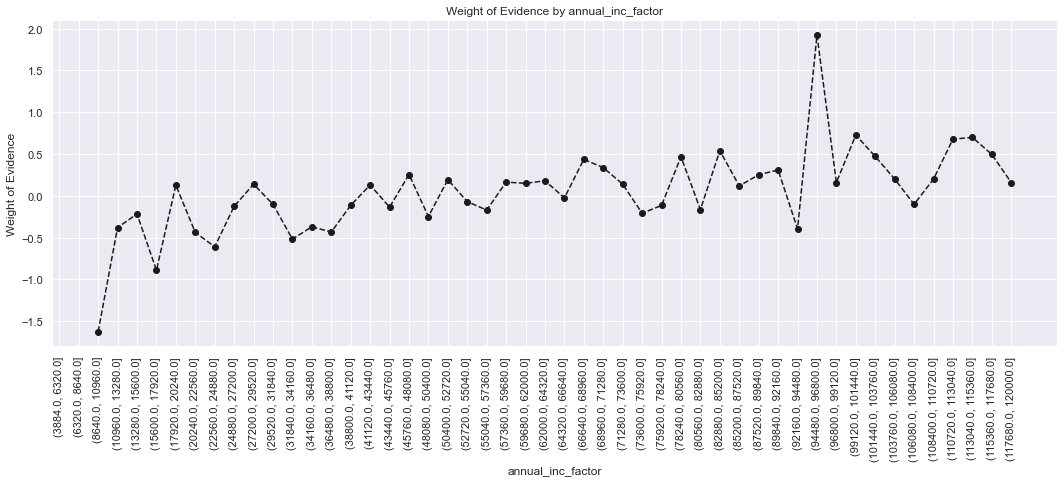

In [198]:
plot_woe(df_temp, 90)

In [199]:
df_inputs_prepr['annual_inc: <18K'] = np.where((df_inputs_prepr['annual_inc'] <= 18000), 1, 0)
df_inputs_prepr['annual_inc: 18K-30K'] = np.where(((df_inputs_prepr['annual_inc'] > 18000) & (df_inputs_prepr['annual_inc'] <= 30000)), 1, 0)
df_inputs_prepr['annual_inc: 30K-40K'] = np.where(((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000)), 1, 0)
df_inputs_prepr['annual_inc: 40K-50K'] = np.where(((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000)), 1, 0)
df_inputs_prepr['annual_inc: 50K-60K'] = np.where(((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000)), 1, 0)
df_inputs_prepr['annual_inc: 60K-70K'] = np.where(((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000)), 1, 0)
df_inputs_prepr['annual_inc: 70K-80K'] = np.where(((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000)), 1, 0)
df_inputs_prepr['annual_inc: 80K-90K'] = np.where(((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000)), 1, 0)
df_inputs_prepr['annual_inc: 90K-100K'] = np.where(((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000)), 1, 0)
df_inputs_prepr['annual_inc: 100K-120K'] = np.where(((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000)), 1, 0)
df_inputs_prepr['annual_inc: >120K'] = np.where((df_inputs_prepr['annual_inc'] > 120000), 1, 0)

In [200]:
df_inputs_prepr['installment'].isnull().sum()

0

In [201]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (14.791, 41.862]     95   0.842105    0.011959    80.0   15.0   
1       (41.862, 67.644]    278   0.863309    0.034995   240.0   38.0   
2       (67.644, 93.427]    321   0.850467    0.040408   273.0   48.0   
3      (93.427, 119.209]    414   0.852657    0.052115   353.0   61.0   
4     (119.209, 144.991]    420   0.852381    0.052870   358.0   62.0   
5     (144.991, 170.773]    573   0.890052    0.072130   510.0   63.0   
6     (170.773, 196.555]    486   0.882716    0.061178   429.0   57.0   
7     (196.555, 222.338]    444   0.887387    0.055891   394.0   50.0   
8      (222.338, 248.12]    417   0.865707    0.052492   361.0   56.0   
9      (248.12, 273.902]    387   0.878553    0.048716   340.0   47.0   
10    (273.902, 299.684]    351   0.829060    0.044184   291.0   60.0   
11    (299.684, 325.466]    445   0.883146    0.056017   393.0   52.0   
12    (325.466, 351.249]    446   0.854260    0.056143   381.0   65.0   
13    (351.249, 377.031]    306   0.901961    0.038520   276.0   30.0   
14    (377.031, 402.813]    295   0.881356    0.037135   260.0   35.0   
15    (402.813, 428.595]    234   0.854701    0.029456   200.0   34.0   
16    (428.595, 454.377]    189   0.835979    0.023792   158.0   31.0   
17     (454.377, 480.16]    202   0.871287    0.025428   176.0   26.0   
18     (480.16, 505.942]    241   0.858921    0.030337   207.0   34.0   
19    (505.942, 531.724]    185   0.810811    0.023288   150.0   35.0   
20    (531.724, 557.506]    118   0.822034    0.014854    97.0   21.0   
21    (557.506, 583.288]    104   0.855769    0.013092    89.0   15.0   
22    (583.288, 609.071]     89   0.797753    0.011203    71.0   18.0   
23    (609.071, 634.853]    103   0.873786    0.012966    90.0   13.0   
24    (634.853, 660.635]    100   0.810000    0.012588    81.0   19.0   
25    (660.635, 686.417]    117   0.846154    0.014728    99.0   18.0   
26    (686.417, 712.199]     77   0.831169    0.009693    64.0   13.0   
27    (712.199, 737.982]     44   0.840909    0.005539    37.0    7.0   
28    (737.982, 763.764]     38   0.842105    0.004783    32.0    6.0   
29    (763.764, 789.546]     58   0.896552    0.007301    52.0    6.0   
30    (789.546, 815.328]     75   0.906667    0.009441    68.0    7.0   
31     (815.328, 841.11]     72   0.861111    0.009063    62.0   10.0   
32     (841.11, 866.893]     43   0.697674    0.005413    30.0   13.0   
33    (866.893, 892.675]     44   0.795455    0.005539    35.0    9.0   
34    (892.675, 918.457]     38   0.842105    0.004783    32.0    6.0   
35    (918.457, 944.239]     17   0.764706    0.002140    13.0    4.0   
36    (944.239, 970.021]     12   0.750000    0.001511     9.0    3.0   
37    (970.021, 995.804]     14   0.857143    0.001762    12.0    2.0   
38   (995.804, 1021.586]      3   1.000000    0.000378     3.0    0.0   
39  (1021.586, 1047.368]      4   1.000000    0.000504     4.0    0.0   
40   (1047.368, 1073.15]      5   1.000000    0.000629     5.0    0.0   
41   (1073.15, 1098.932]     10   0.900000    0.001259     9.0    1.0   
42  (1098.932, 1124.715]      9   1.000000    0.001133     9.0    0.0   
43  (1124.715, 1150.497]      3   1.000000    0.000378     3.0    0.0   
44  (1150.497, 1176.279]      5   1.000000    0.000629     5.0    0.0   
45  (1176.279, 1202.061]      4   0.500000    0.000504     2.0    2.0   
46  (1202.061, 1227.843]      1   1.000000    0.000126     1.0    0.0   
47  (1227.843, 1253.626]      4   1.000000    0.000504     4.0    0.0   
48  (1253.626, 1279.408]      1   1.000000    0.000126     1.0    0.0   
49   (1279.408, 1305.19]      3   0.333333    0.000378     1.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.011679    0.013711 -0.160432             NaN       NaN  inf  
1      0.035036    0.034735  0.008645        0.021204  0.169076  inf  
2      0.039854    0.043876 -0.096137        0.012842  0.104782  inf 

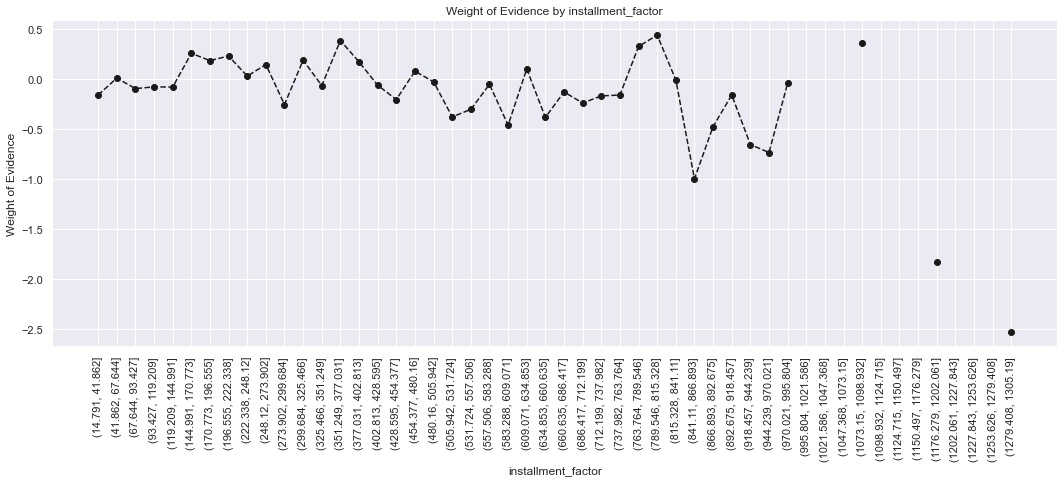

In [202]:
plot_woe(df_temp, 90)

In [203]:
df_inputs_prepr['installment: <100'] = np.where((df_inputs_prepr['installment'] <= 100), 1, 0)
df_inputs_prepr['installment: 100-200'] = np.where(((df_inputs_prepr['installment'] > 100) & (df_inputs_prepr['installment'] <= 200)), 1, 0)
df_inputs_prepr['installment: 200-300'] = np.where(((df_inputs_prepr['installment'] > 200) & (df_inputs_prepr['installment'] <= 300)), 1, 0)
df_inputs_prepr['installment: 300-400'] = np.where(((df_inputs_prepr['installment'] > 300) & (df_inputs_prepr['installment'] <= 400)), 1, 0)
df_inputs_prepr['installment: 400-500'] = np.where(((df_inputs_prepr['installment'] > 400) & (df_inputs_prepr['installment'] <= 500)), 1, 0)
df_inputs_prepr['installment: 500-600'] = np.where(((df_inputs_prepr['installment'] > 500) & (df_inputs_prepr['installment'] <= 600)), 1, 0)
df_inputs_prepr['installment: 600-700'] = np.where(((df_inputs_prepr['installment'] > 600) & (df_inputs_prepr['installment'] <= 700)), 1, 0)
df_inputs_prepr['installment: >700'] = np.where((df_inputs_prepr['installment'] > 700), 1, 0)

In [204]:
df_inputs_prepr['dti'].isnull().sum()

0

In [205]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 25)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.03, 1.2]    220   0.881818    0.027694   194.0   26.0   
1       (1.2, 2.399]    215   0.911628    0.027064   196.0   19.0   
2     (2.399, 3.599]    223   0.887892    0.028072   198.0   25.0   
3     (3.599, 4.798]    304   0.871711    0.038268   265.0   39.0   
4     (4.798, 5.998]    319   0.887147    0.040156   283.0   36.0   
5     (5.998, 7.198]    368   0.864130    0.046324   318.0   50.0   
6     (7.198, 8.397]    402   0.885572    0.050604   356.0   46.0   
7     (8.397, 9.597]    434   0.852535    0.054632   370.0   64.0   
8    (9.597, 10.796]    481   0.893971    0.060549   430.0   51.0   
9   (10.796, 11.996]    460   0.891304    0.057905   410.0   50.0   
10  (11.996, 13.196]    497   0.843058    0.062563   419.0   78.0   
11  (13.196, 14.395]    478   0.845188    0.060171   404.0   74.0   
12  (14.395, 15.595]    476   0.878151    0.059919   418.0   58.0   
13  (15.595, 16.794]    423   0.855792    0.053248   362.0   61.0   
14  (16.794, 17.994]    428   0.866822    0.053877   371.0   57.0   
15  (17.994, 19.194]    423   0.848700    0.053248   359.0   64.0   
16  (19.194, 20.393]    437   0.830664    0.055010   363.0   74.0   
17  (20.393, 21.593]    370   0.859459    0.046576   318.0   52.0   
18  (21.593, 22.792]    361   0.847645    0.045443   306.0   55.0   
19  (22.792, 23.992]    282   0.790780    0.035498   223.0   59.0   
20  (23.992, 25.192]    232   0.818966    0.029204   190.0   42.0   
21  (25.192, 26.391]     32   0.843750    0.004028    27.0    5.0   
22  (26.391, 27.591]     35   0.828571    0.004406    29.0    6.0   
23   (27.591, 28.79]     25   0.920000    0.003147    23.0    2.0   
24    (28.79, 29.99]     19   0.947368    0.002392    18.0    1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.028321    0.023766  0.175354             NaN       NaN  0.047537  
1      0.028613    0.017367  0.499268        0.029810  0.323914  0.047537  
2      0.028905    0.022852  0.234983        0.023736  0.264284  0.047537  
3      0.038686    0.035649  0.081760        0.016182  0.153223  0.047537  
4      0.041314    0.032907  0.227520        0.015437  0.145760  0.047537  
5      0.046423    0.045704  0.015620        0.023017  0.211900  0.047537  
6      0.051971    0.042048  0.211881        0.021442  0.196261  0.047537  
7      0.054015    0.058501 -0.079788        0.033038  0.291669  0.047537  
8      0.062774    0.046618  0.297552        0.041436  0.377340  0.047537  
9      0.059854    0.045704  0.269726        0.002667  0.027825  0.047537  
10     0.061168    0.071298 -0.153246        0.048246  0.422972  0.047537  
11     0.058978    0.067642 -0.137058        0.002130  0.016188  0.047537  
12     0.061022    0.053016  0.140630        0.032963  0.277689  0.047537  
13     0.052847    0.055759 -0.053638        0.022359  0.194268  0.047537  
14     0.054161    0.052102  0.038743        0.011030  0.092380  0.047537  
15     0.052409    0.058501 -0.109969        0.018123  0.148711  0.047537  
16     0.052993    0.067642 -0.244070        0.018036  0.134102  0.047537  
17     0.046423    0.047532 -0.023600        0.028796  0.220470  0.047537  
18     0.044672    0.050274 -0.118156        0.011814  0.094556  0.047537  
19     0.032555    0.053931 -0.504774        0.056865  0.386618  0.047537  
20     0.027737    0.038391 -0.325053        0.028185  0.179720  0.047537  
21     0.003942    0.004570 -0.148009        0.024784  0.177044  0.047537  
22     0.004234    0.005484 -0.258872        0.015179  0.110863  0.047537  
23     0.003358    0.001828  0.607939        0.091429  0.866811  0.047537  
24     0.002628    0.000914  1.055964        0.027368  0.448025  0.047537

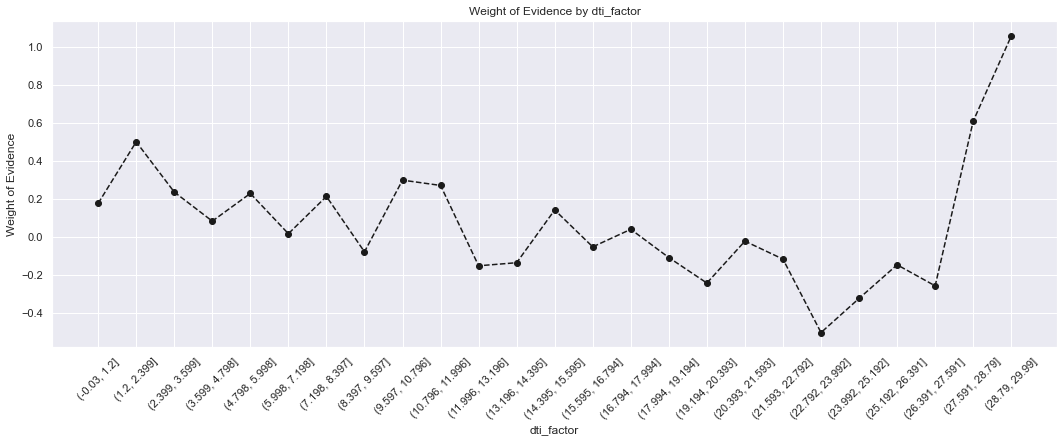

In [206]:
plot_woe(df_temp, 45)

In [207]:
df_inputs_prepr['dti: <5'] = np.where((df_inputs_prepr['dti'] <= 5), 1, 0)
df_inputs_prepr['dti: 5-10'] = np.where(((df_inputs_prepr['dti'] > 5) & (df_inputs_prepr['dti'] <= 10)), 1, 0)
df_inputs_prepr['dti: 10-15'] = np.where(((df_inputs_prepr['dti'] > 10) & (df_inputs_prepr['dti'] <= 15)), 1, 0)
df_inputs_prepr['dti: 15-20'] = np.where(((df_inputs_prepr['dti'] > 15) & (df_inputs_prepr['dti'] <= 20)), 1, 0)
df_inputs_prepr['dti: 20-25'] = np.where(((df_inputs_prepr['dti'] > 20) & (df_inputs_prepr['dti'] <= 25)), 1, 0)
df_inputs_prepr['dti: >25'] = np.where((df_inputs_prepr['dti'] > 25), 1, 0)

In [208]:
df_inputs_prepr['inq_last_6mths'].isnull().sum()

0

In [209]:
df_inputs_prepr['inq_last_6mths'].unique()

array([2, 1, 4, 0, 3, 5, 7, 6, 8], dtype=int64)

In [210]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0               0   3867   0.882079    0.486782  3411.0  456.0     0.497956   
1               1   2191   0.852122    0.275806  1867.0  324.0     0.272555   
2               2   1169   0.854577    0.147155   999.0  170.0     0.145839   
3               3    593   0.794266    0.074648   471.0  122.0     0.068759   
4               4     71   0.830986    0.008938    59.0   12.0     0.008613   
5               5     35   0.828571    0.004406    29.0    6.0     0.004234   
6               6      9   0.777778    0.001133     7.0    2.0     0.001022   
7               7      5   0.600000    0.000629     3.0    2.0     0.000438   
8               8      4   1.000000    0.000504     4.0    0.0     0.000584   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.416819  0.177860             NaN       NaN  inf  
1    0.296161 -0.083063        0.029957  0.260923  inf  
2    0.155393 -0.063452        0.002454  0.019612  inf  
3    0.111517 -0.483571        0.060310  0.420119  inf  
4    0.010969 -0.241777        0.036719  0.241794  inf  
5    0.005484 -0.258872        0.002414  0.017094  inf  
6    0.001828 -0.581645        0.050794  0.322773  inf  
7    0.001828 -1.428943        0.177778  0.847298  inf  
8    0.000000       inf        0.400000       inf  inf

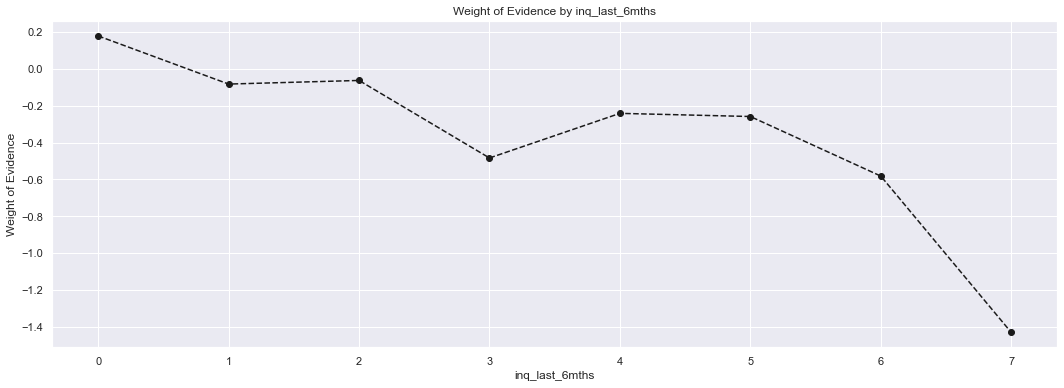

In [211]:
plot_woe(df_temp)

In [212]:
df_inputs_prepr['inq_last_6mths: 0'] = np.where(df_inputs_prepr['inq_last_6mths'] == 0, 1, 0)
df_inputs_prepr['inq_last_6mths: 1'] = np.where(df_inputs_prepr['inq_last_6mths'] == 1, 1, 0)
df_inputs_prepr['inq_last_6mths: 2'] = np.where(df_inputs_prepr['inq_last_6mths'] == 2, 1, 0)
df_inputs_prepr['inq_last_6mths: 3'] = np.where(df_inputs_prepr['inq_last_6mths'] == 3, 1, 0)
df_inputs_prepr['inq_last_6mths: >4'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(4, df_inputs_prepr['inq_last_6mths'].max())), 1, 0)

In [213]:
df_inputs_prepr['mths_since_last_delinq'].describe()

count    7944.000000
mean       12.543429
std        21.560058
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       103.000000
Name: mths_since_last_delinq, dtype: float64

In [214]:
df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr['mths_since_last_delinq'] != 0]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\gk514\AppData\Local\Temp/ipykernel_9700/644652429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                  (0.898, 3.04]     52   0.865385    0.019483    45.0    7.0   
1                   (3.04, 5.08]     59   0.847458    0.022106    50.0    9.0   
2                   (5.08, 7.12]     78   0.858974    0.029224    67.0   11.0   
3                   (7.12, 9.16]     66   0.818182    0.024728    54.0   12.0   
4                   (9.16, 11.2]     69   0.855072    0.025852    59.0   10.0   
5                  (11.2, 13.24]     66   0.878788    0.024728    58.0    8.0   
6                 (13.24, 15.28]     75   0.893333    0.028100    67.0    8.0   
7                 (15.28, 17.32]     80   0.850000    0.029974    68.0   12.0   
8                 (17.32, 19.36]     99   0.797980    0.037093    79.0   20.0   
9                  (19.36, 21.4]     98   0.867347    0.036718    85.0   13.0   
10                 (21.4, 23.44]     93   0.806452    0.034845    75.0   18.0   
11                (23.44, 25.48]     97   0.865979    0.036343    84.0   13.0   
12                (25.48, 27.52]     84   0.785714    0.031472    66.0   18.0   
13                (27.52, 29.56]     80   0.850000    0.029974    68.0   12.0   
14                 (29.56, 31.6]    101   0.881188    0.037842    89.0   12.0   
15                 (31.6, 33.64]     88   0.852273    0.032971    75.0   13.0   
16                (33.64, 35.68]     68   0.867647    0.025478    59.0    9.0   
17                (35.68, 37.72]     71   0.845070    0.026602    60.0   11.0   
18                (37.72, 39.76]     73   0.890411    0.027351    65.0    8.0   
19                 (39.76, 41.8]     84   0.892857    0.031472    75.0    9.0   
20                 (41.8, 43.84]     94   0.829787    0.035219    78.0   16.0   
21                (43.84, 45.88]     80   0.800000    0.029974    64.0   16.0   
22                (45.88, 47.92]     90   0.844444    0.033720    76.0   14.0   
23                (47.92, 49.96]     67   0.895522    0.025103    60.0    7.0   
24                 (49.96, 52.0]     71   0.845070    0.026602    60.0   11.0   
25                 (52.0, 54.04]     56   0.928571    0.020982    52.0    4.0   
26                (54.04, 56.08]     44   0.909091    0.016486    40.0    4.0   
27                (56.08, 58.12]     53   0.905660    0.019858    48.0    5.0   
28                (58.12, 60.16]     50   0.860000    0.018734    43.0    7.0   
29                 (60.16, 62.2]     62   0.854839    0.023230    53.0    9.0   
30                 (62.2, 64.24]     43   0.837209    0.016111    36.0    7.0   
31                (64.24, 66.28]     33   0.969697    0.012364    32.0    1.0   
32                (66.28, 68.32]     49   0.857143    0.018359    42.0    7.0   
33                (68.32, 70.36]     45   0.822222    0.016860    37.0    8.0   
34                 (70.36, 72.4]     50   0.860000    0.018734    43.0    7.0   
35                 (72.4, 74.44]     44   0.840909    0.016486    37.0    7.0   
36                (74.44, 76.48]     42   0.976190    0.015736    41.0    1.0   
37                (76.48, 78.52]     40   0.750000    0.014987    30.0   10.0   
38                (78.52, 80.56]     41   0.853659    0.015362    35.0    6.0   
39                 (80.56, 82.6]     30   0.733333    0.011240    22.0    8.0   
40                 (82.6, 84.64]      2   0.500000    0.000749     1.0    1.0   
41                (84.64, 86.68]      1   1.000000    0.000375     1.0    0.0   
42                (86.68, 88.72]      0        NaN    0.000000     NaN    NaN   
43                (88.72, 90.76]      0        NaN    0.000000     NaN    NaN   
44                 (90.76, 92.8]      0        NaN    0.000000     NaN    NaN   
45                 (92.8, 94.84]      0        NaN    0.000000     NaN    NaN   
46                (94.84, 96.88]      0        NaN    0.000000     NaN    NaN   
47                (96.88, 98.92]      0        NaN    0.000000     NaN    NaN   
48               (98.92, 100.96]  

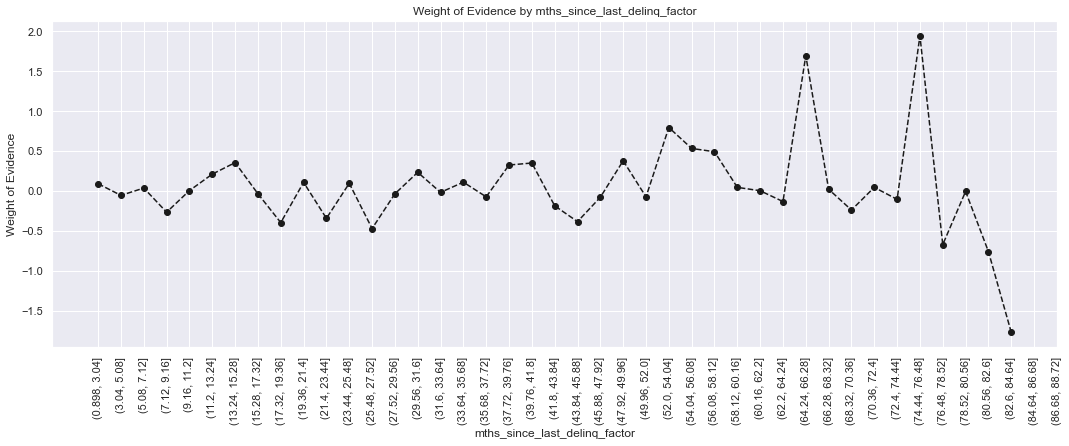

In [215]:
plot_woe(df_temp, 90)

In [216]:
df_inputs_prepr['mths_since_last_delinq: <15'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] > 0) & df_inputs_prepr['mths_since_last_delinq'] < 16), 1, 0)
df_inputs_prepr['mths_since_last_delinq: 16-43'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] >= 16) & (df_inputs_prepr['mths_since_last_delinq'] < 44)), 1, 0)
df_inputs_prepr['mths_since_last_delinq: 44-67'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] >= 44) & (df_inputs_prepr['mths_since_last_delinq'] < 68)), 1, 0)
df_inputs_prepr['mths_since_last_delinq: >68'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 68), 1, 0)
df_inputs_prepr['mths_since_last_delinq: Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'] == 0), 1, 0)

In [217]:
df_inputs_prepr['mths_since_last_record'].isnull().sum()

7396

In [218]:
df_inputs_prepr['initial_list_status'].value_counts()

f    7944
Name: initial_list_status, dtype: int64

In [219]:
df_inputs_prepr['int_rate_int'].describe()

count    7944.000000
mean        0.120304
std         0.037135
min         0.054200
25%         0.092000
50%         0.118600
75%         0.146100
max         0.239100
Name: int_rate_int, dtype: float64

In [220]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate_int'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0    (0.054, 0.0579]    112   0.955357    0.014099   107.0    5.0   
1   (0.0579, 0.0616]    233   0.974249    0.029330   227.0    6.0   
2   (0.0616, 0.0653]     65   0.984615    0.008182    64.0    1.0   
3    (0.0653, 0.069]    165   0.939394    0.020770   155.0   10.0   
4    (0.069, 0.0727]    259   0.965251    0.032603   250.0    9.0   
5   (0.0727, 0.0764]    390   0.958974    0.049094   374.0   16.0   
6   (0.0764, 0.0801]    427   0.948478    0.053751   405.0   22.0   
7   (0.0801, 0.0838]     12   0.833333    0.001511    10.0    2.0   
8   (0.0838, 0.0875]    158   0.924051    0.019889   146.0   12.0   
9   (0.0875, 0.0912]    164   0.878049    0.020645   144.0   20.0   
10  (0.0912, 0.0949]     87   0.942529    0.010952    82.0    5.0   
11  (0.0949, 0.0986]    141   0.851064    0.017749   120.0   21.0   
12   (0.0986, 0.102]    287   0.891986    0.036128   256.0   31.0   
13    (0.102, 0.106]    317   0.899054    0.039904   285.0   32.0   
14     (0.106, 0.11]    277   0.888087    0.034869   246.0   31.0   
15     (0.11, 0.113]    363   0.881543    0.045695   320.0   43.0   
16    (0.113, 0.117]    277   0.866426    0.034869   240.0   37.0   
17    (0.117, 0.121]    416   0.896635    0.052367   373.0   43.0   
18    (0.121, 0.124]    215   0.860465    0.027064   185.0   30.0   
19    (0.124, 0.128]    291   0.841924    0.036631   245.0   46.0   
20    (0.128, 0.132]    318   0.864780    0.040030   275.0   43.0   
21    (0.132, 0.136]    389   0.848329    0.048968   330.0   59.0   
22    (0.136, 0.139]    216   0.847222    0.027190   183.0   33.0   
23    (0.139, 0.143]    286   0.800699    0.036002   229.0   57.0   
24    (0.143, 0.147]    161   0.850932    0.020267   137.0   24.0   
25     (0.147, 0.15]    206   0.820388    0.025932   169.0   37.0   
26     (0.15, 0.154]    239   0.803347    0.030086   192.0   47.0   
27    (0.154, 0.158]    168   0.833333    0.021148   140.0   28.0   
28    (0.158, 0.161]    198   0.782828    0.024924   155.0   43.0   
29    (0.161, 0.165]    163   0.742331    0.020519   121.0   42.0   
30    (0.165, 0.169]    103   0.757282    0.012966    78.0   25.0   
31    (0.169, 0.173]     86   0.779070    0.010826    67.0   19.0   
32    (0.173, 0.176]    172   0.726744    0.021652   125.0   47.0   
33     (0.176, 0.18]     64   0.656250    0.008056    42.0   22.0   
34     (0.18, 0.184]     65   0.769231    0.008182    50.0   15.0   
35    (0.184, 0.187]    109   0.715596    0.013721    78.0   31.0   
36    (0.187, 0.191]     62   0.758065    0.007805    47.0   15.0   
37    (0.191, 0.195]     71   0.774648    0.008938    55.0   16.0   
38    (0.195, 0.198]     34   0.705882    0.004280    24.0   10.0   
39    (0.198, 0.202]     30   0.700000    0.003776    21.0    9.0   
40    (0.202, 0.206]     41   0.658537    0.005161    27.0   14.0   
41     (0.206, 0.21]     34   0.588235    0.004280    20.0   14.0   
42     (0.21, 0.213]     21   0.761905    0.002644    16.0    5.0   
43    (0.213, 0.217]     15   0.800000    0.001888    12.0    3.0   
44    (0.217, 0.221]     13   0.692308    0.001636     9.0    4.0   
45    (0.221, 0.224]     11   0.454545    0.001385     5.0    6.0   
46    (0.224, 0.228]      7   0.571429    0.000881     4.0    3.0   
47    (0.228, 0.232]      1   1.000000    0.000126     1.0    0.0   
48    (0.232, 0.235]      2   0.500000    0.000252     1.0    1.0   
49    (0.235, 0.239]      3   1.000000    0.000378     3.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.015620    0.004570  1.228983             NaN       NaN  inf  
1      0.033139    0.005484  1.798783        0.018892  0.569800  inf  
2      0.009343    0.000914  2.324475        0.010366  0.525693  inf  
3      0.022628    0.009141  0.906432        0.045221  1.418043  inf  
4      0.036496    0.008227  1.489828        0.025857  0.583396  inf  
5      0.054599    0.014625  1.317259        0.006277  0.17

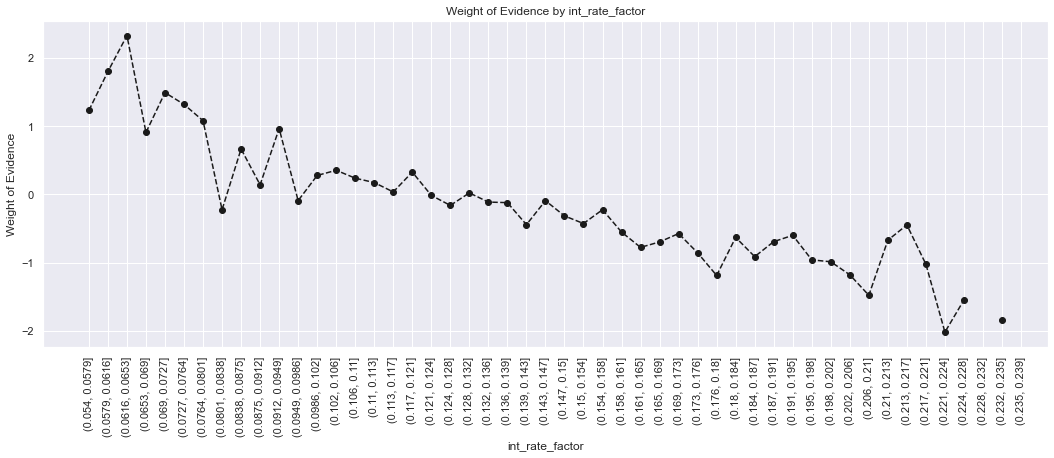

In [221]:
plot_woe(df_temp, 90)

In [222]:
df_inputs_prepr['int_rate: <0.0619'] = np.where((df_inputs_prepr['int_rate_int'] <= 0.0619), 1, 0)
df_inputs_prepr['int_rate: 0.0619-0.0849'] = np.where(((df_inputs_prepr['int_rate_int'] > 0.0619) & (df_inputs_prepr['int_rate_int'] <= 0.0849)), 1, 0)
df_inputs_prepr['int_rate: 0.0849-0.112'] = np.where(((df_inputs_prepr['int_rate_int'] > 0.0849) & (df_inputs_prepr['int_rate_int'] <= 0.112)), 1, 0)
df_inputs_prepr['int_rate: 0.112-0.15'] = np.where(((df_inputs_prepr['int_rate_int'] > 0.112) & (df_inputs_prepr['int_rate_int'] <= 0.15)), 1, 0)
df_inputs_prepr['int_rate: 0.15-0.188'] = np.where(((df_inputs_prepr['int_rate_int'] > 0.15) & (df_inputs_prepr['int_rate_int'] <= 0.188)), 1, 0)
df_inputs_prepr['int_rate: >0.188'] = np.where((df_inputs_prepr['int_rate_int'] > 0.188), 1, 0)

In [223]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 25)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                   (121.524, 141.04]    139   0.812950    0.017497   113.0   
1                    (141.04, 160.08]    408   0.825980    0.051360   337.0   
2                    (160.08, 179.12]    550   0.865455    0.069235   476.0   
3                    (179.12, 198.16]    653   0.856049    0.082200   559.0   
4                     (198.16, 217.2]    742   0.857143    0.093404   636.0   
5                     (217.2, 236.24]    976   0.858607    0.122860   838.0   
6                    (236.24, 255.28]    856   0.852804    0.107754   730.0   
7                    (255.28, 274.32]    701   0.878745    0.088243   616.0   
8                    (274.32, 293.36]    689   0.883890    0.086732   609.0   
9                     (293.36, 312.4]    515   0.871845    0.064829   449.0   
10                    (312.4, 331.44]    319   0.843260    0.040156   269.0   
11                   (331.44, 350.48]    315   0.869841    0.039653   274.0   
12                   (350.48, 369.52]    253   0.861660    0.031848   218.0   
13                   (369.52, 388.56]    206   0.898058    0.025932   185.0   
14                    (388.56, 407.6]    143   0.860140    0.018001   123.0   
15                    (407.6, 426.64]    111   0.855856    0.013973    95.0   
16                   (426.64, 445.68]     89   0.786517    0.011203    70.0   
17                   (445.68, 464.72]     59   0.983051    0.007427    58.0   
18                   (464.72, 483.76]     61   0.819672    0.007679    50.0   
19                    (483.76, 502.8]     33   0.909091    0.004154    30.0   
20                    (502.8, 521.84]     28   0.964286    0.003525    27.0   
21                   (521.84, 540.88]     31   0.870968    0.003902    27.0   
22                   (540.88, 559.92]     21   0.904762    0.002644    19.0   
23                   (559.92, 578.96]     18   0.944444    0.002266    17.0   
24                    (578.96, 598.0]     28   0.892857    0.003525    25.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0    26.0     0.016496    0.023766 -0.365117             NaN       NaN   
1    71.0     0.049197    0.064899 -0.277005        0.013031  0.088112   
2    74.0     0.069489    0.067642  0.026945        0.039474  0.303950   
3    94.0     0.081606    0.085923 -0.051553        0.009406  0.078498   
4   106.0     0.092847    0.096892 -0.042648        0.001094  0.008905   
5   138.0     0.122336    0.126143 -0.030644        0.001464  0.012005   
6   126.0     0.106569    0.115174 -0.077645        0.005803  0.047002   
7    85.0     0.089927    0.077697  0.146188        0.025941  0.223833   
8    80.0     0.088905    0.073126  0.195384        0.005145  0.049196   
9    66.0     0.065547    0.060329  0.082960        0.012045  0.112423   
10   50.0     0.039270    0.045704 -0.151720        0.028584  0.234680   
11   41.0     0.040000    0.037477  0.065148        0.026581  0.216868   
12   35.0     0.031825    0.031993 -0.005261        0.008181  0.070409   
13   21.0     0.027007    0.019196  0.341425        0.036398  0.346686   
14   20.0     0.017956    0.018282 -0.017956        0.037918  0.359381   
15   16.0     0.013869    0.014625 -0.053120        0.004284  0.035164   
16   19.0     0.010219    0.017367 -0.530352        0.069339  0.477232   
17    1.0     0.008467    0.000914  2.226035        0.196534  2.756387   
18   11.0     0.007299    0.010055 -0.320280        0.163379  2.546315   
19    3.0     0.004380    0.002742  0.468177        0.089419  0.788457   
20    1.0     0.003942    0.000914  1.461429        0.055195  0.993252   
21    4.0     0.003942    0.003656  0.075135        0.093318  1.386294   
22    2.0     0.002774    0.001828  0.416884        0.033794  0.341749   
23    1.0     0.002482    0.000914  0.998805        0.039683  0.581922   
24    3.0     0.003650    0.002742  0.285856        0.051587  0.712950   

          IV  
0   0.04

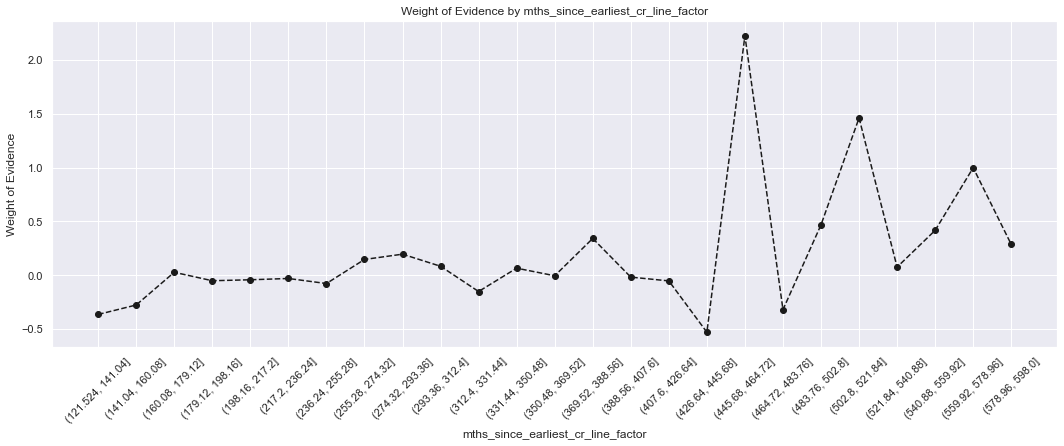

In [224]:
plot_woe(df_temp, 45)

In [225]:
df_inputs_prepr['mths_since_earliest_cr_line: <159'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] <= 159), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line: 159-178'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 159) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 178)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line: 178-197'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 178) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 197)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line: 197-311'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 197) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 311)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line: 311-388'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 311) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 388)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line: >388'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] > 388), 1, 0)

In [226]:
# loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

Saving the preprocessed dataset into a csv file

In [227]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')